<img src="data/images/banner1989.png" width=100%>

Welcome to the Midterm Project! This project is due **Thursday, February 15 at 11:59PM**.

Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is comprehensive, meaning that it draws upon everything we've learned this quarter so far. Second, since problems can vary quite a bit in difficulty, some problems will be worth more points than others. Finally, in a project, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life."

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework. You are especially encouraged to **find a partner** to work through the project with. If you work in a pair, you must follow the [Project Partner Guidelines](https://dsc10.com/project-partners/) on the course website. In particular, you must work together at the same time, and you are not allowed to split up the project and each work on certain problems. If you work with a partner, only one of you needs to upload your notebook to Gradescope; after uploading, you'll see an option to add the other partner to the submission.

**Important:** The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

**Avoid looping through DataFrames unless instructed to do so. Do not import any packages.** Loops in Python are slow, and looping through DataFrames should usually be avoided in favor of the DataFrame methods we've learned in class, which are much faster. Please do not import any additional packages – you don't need them, and our autograder may not be able to run your code if you do.

As you work through this project, there are a few resources you may want to have open:
- [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view)
- [`babypandas` notes](https://notes.dsc10.com/front.html)
- [`babypandas` documentation](https://babypandas.readthedocs.io/en/latest/)
- Other links in the [Resources](https://dsc10.com/resources/) and [Debugging](https://dsc10.com/debugging/) tabs of the course website

Start early, good luck, and let's begin! 🏃

In [1]:
# Please don't change this cell, but make sure to run it.
import babypandas as bpd
import numpy as np
from IPython.display import HTML, display, IFrame, YouTubeVideo, Markdown, clear_output
import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 5)

import otter
import numbers
grader = otter.Notebook()

def play_spotify(uri):
    code = uri[uri.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

<a id='outline'></a>

### Outline 

The project is divided into four main sections, each of which contains several questions. Use the outline below to help you quickly navigate to the part of the project you're working on. Questions are worth one point each, unless they contain a ⭐️⭐️ next to them, in which case they are worth two points (e.g. **Question 0.3. ⭐️⭐️**). You can expect questions worth two points to be longer and more challenging than questions worth one point.

- [Welcome to `tswift`, it's been waitin' for you! 👩‍💻](#section0)
- [Section 1: Data Visualization 👀](#section1)
- [Section 2:  Song Recommender 🎧](#section2)
- [Section 3: Lyric Searcher 🔍](#section3)
- [Section 4: Keywords 🔑](#section4)


There's also a [Taylor Swift Emoji Quiz 💯](#emojiquiz) at the end of the project, just for fun. Try to identify the Taylor Swift song based on an emoji description, and see how many you can get!

<a id='section0'></a>
## Welcome to `tswift`, it's been waitin' for you! 👩‍💻
<small>(<a href="#outline">return to the outline</a>)</small>

In case you've been living under a rock, allow us to introduce you to Taylor Swift, a famous singer, songwriter, and cultural icon. She has set all kinds of records in the music industry, including earning the most American Music Awards in history. She is also the most-streamed female artist on Spotify, a digital music streaming service. 

With its origins in country music, Taylor Swift's style has evolved a lot since her 2006 debut album. In her most recent concert tour, *The Eras Tour*, she guides fans through these musical "eras" in a three-hour performance which fans are paying thousands of dollars to attend. The film version of *The Eras Tour* became the highest-grossing concert film in history in just one weekend when it was released in October.

<img src="data/images/eras.jpg" width=50%>

Chances are, you probably have heard some of Taylor Swift's songs; you might even know the words to all of them. In this project, we'll look at Taylor Swift's songs through the lens of data science. We have data on both the lyrics and audio qualities of Taylor Swift's musical body of work. 

The datasets we will use contain all songs on each of Taylor Swift's [ten studio albums](https://en.wikipedia.org/wiki/Taylor_Swift_albums_discography#Studio_albums). We've chosen to use deluxe or extended versions of these albums when available, to include more songs, but we've eliminated duplicate versions of songs, such as acoustic versions and remixes. We've also chosen to include the rerecorded "[Taylor's Version](https://www.vox.com/culture/22278732/taylor-swift-re-recording-1989-speak-now-enchanted-mine-master-rights-scooter-braun)" when available. Our datasets don't include Taylor Swift songs that were released as part of movie soundtracks, live recordings, holiday specials, or through any other mechanism.

We'll work with two DataFrames throughout the project:
- The `lyrics` DataFrame contains the lyrics of each Taylor Swift song.  The data in `lyrics` comes from [Genius](https://genius.com/), "the world's biggest collection of song lyrics and crowdsourced musical knowledge."
- The `tswift` DataFrame contains information about the audio features of each song. The data in `tswift` comes from [Spotify](https://open.spotify.com/). 

Let's start by reading in these DataFrames and taking a look around. Run the cell below to load `lyrics`.

In [2]:
lyrics = bpd.read_csv('data/lyrics.csv')
lyrics

,Album,Song,Lyrics
0,Midnights,Anti-Hero,"I have this thing where I get older, but just ..."
1,Midnights,Bejeweled,"Baby love, I think I've been a little too kind..."
2,Midnights,Bigger Than The Whole Sky,No words appear before me in the aftermath\nSa...
3,Midnights,Dear Reader,"Dear reader, if it feels like a trap\nYou're a..."
4,Midnights,Glitch,We were supposed to be just friends\nYou don't...
...,...,...,...
193,Taylor Swift,Stay Beautiful,"Cory's eyes are like a jungle\nHe smiles, it's..."
194,Taylor Swift,Teardrops On My Guitar,Drew looks at me\nI fake a smile so he won't s...
195,Taylor Swift,The Outside,I didn't know what I would find\nWhen I went l...
196,Taylor Swift,Tied Together With A Smile,Seems the only one who doesn't see your beauty...


**Question 0.1.** Choose an appropriate index for `lyrics` and set the index to that column.

<!--
BEGIN QUESTION
name: q0_1
points: 1
-->

In [3]:
lyrics = lyrics.set_index('Song')
lyrics

,Album,Lyrics
Song,,
Anti-Hero,Midnights,"I have this thing where I get older, but just ..."
Bejeweled,Midnights,"Baby love, I think I've been a little too kind..."
Bigger Than The Whole Sky,Midnights,No words appear before me in the aftermath\nSa...
Dear Reader,Midnights,"Dear reader, if it feels like a trap\nYou're a..."
Glitch,Midnights,We were supposed to be just friends\nYou don't...
...,...,...
Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's..."
Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...


In [4]:
grader.check("q0_1")

q0_1 results: All test cases passed!

**Question 0.2.** Set `mastermind` to the lyrics of the song `'Mastermind'`. Compare what happens when you display the value of `mastermind` versus print `mastermind`.

<!--
BEGIN QUESTION
name: q0_2
points: 1
-->

In [5]:
mastermind = lyrics.loc['Mastermind'].get('Lyrics')
mastermind

"Once upon a time, the planets and the fates\nAnd all the stars aligned\nYou and I ended up in the same room\nAt the same time\n\nAnd the touch of a hand lit the fuse\nOf a chain reaction of countermoves\nTo assess the equation of you\nCheckmate, I couldn't lose\n\nWhat if I told you none of it was accidental?\nAnd the first night that you saw me\nNothing was gonna stop me\nI laid the groundwork, and then\nJust like clockwork\nThe dominoes cascaded in a line\nWhat if I told you I'm a mastermind?\nAnd now you're mine\nIt was all by dеsign\n'Cause I'm a mastermind\n\nYou see, all the wisеst women\nHad to do it this way\n'Cause we were born to be the pawn\nIn every lover's game\n\nIf you fail to plan, you plan to fail\nStrategy sets the scene for the tale\nI'm the wind in our free-flowing sails\nAnd the liquor in our cocktails\n\nWhat if I told you none of it was accidental?\nAnd the first night that you saw me\nI knew I wanted your body\nI laid the groundwork, and then\nJust like clockwo

In [6]:
grader.check("q0_2")

q0_2 results: All test cases passed!

Since the lyrics data is all text, you'll be working a lot with strings throughout this project. Make sure to review the [available string methods](https://docs.python.org/3/library/stdtypes.html#string-methods) so you know how to work with the lyrics data effectively.

Next, let's look at the `tswift` DataFrame. Run the cell below to load in the DataFrame and take a look around.

In [7]:
tswift = bpd.read_csv('data/tswift.csv')
tswift

,URI,Album,Song Name,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,1,2,99,False,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4
1,0V3wPSX9ygBnCm8psDIegu,Midnights,Anti-Hero,1,3,93,False,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690,4
2,1Iq8oo9XkmmvCQiGOfORiz,1989,Is It Over Now?,1,21,92,False,0.596,0.658,0,-7.346,1,0.0360,0.05040,0.000000,0.1270,0.176,100.012,229478,4
3,3hUxzQpSfdDqwM3ZTFQY0K,folklore,august,1,8,92,False,0.532,0.623,5,-9.208,1,0.0331,0.53800,0.000073,0.0925,0.403,89.937,261923,4
4,1R0a2iXumgCiFb7HEZ7gUE,Reputation,Don't Blame Me,1,4,91,False,0.615,0.534,9,-6.719,0,0.0386,0.10600,0.000018,0.0607,0.193,135.917,236413,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,1,7,59,False,0.479,0.578,2,-4.963,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4
194,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,1,8,59,False,0.594,0.629,8,-4.919,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4
195,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,1,6,58,False,0.589,0.805,5,-4.055,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4
196,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,Invisible,1,13,58,False,0.612,0.394,7,-5.723,1,0.0243,0.63700,0.000000,0.1470,0.233,96.001,203227,4


`tswift` contains a lot of information! We've used the [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) provided by Spotify to create the table below, which describes the columns present in `tswift` and what they represent. Note that many of these features (such as `'Valence'`) are defined and determined by Spotify. We have no way of knowing exactly how they determine the values of these audio features for each song, as their algorithms are proprietary.

| Variable Name | Data Type | Explanation |
| -------- | ------- | ------- |
| `'URI'`  | str | Unique identifier for the song in Spotify. |
| `'Album'`  | str | Album name. |
| `'Song Name'`  | str | Song name. |
| `'Disc Number'`  | int | Disc number, usually 1 unless the album contains more than 1 disc. |
| `'Track Number'`  | int | The number of the track on the specified disc. |
| `'Popularity'`  | int | 0 to 100 scale of the current popularity of the song. |
| `'Explicit'`  | bool | True if the song contains explicit words, False otherwise. |
| `'Danceability'`  | float | 0 to 1 scale of how suitable a track is for dancing. |
| `'Energy'`  | float | 0 to 1 scale of a track's activity and intensity. |
| `'Key'`  | int | The average key/pitch of a track, where 0 = C, 1 = C#/Db, 2 = D, and so on. |
| `'Loudness'`  | float | The average loudness of a track, measured on a relative scale in decibels. Values typically range between -60 (softer) and 0 (louder). |
| `'Mode'`  | int | Either 0 for a minor key, or 1 for a major key.|
| `'Speechiness'`  | float | 0 to 1 scale measuring the prevalence of spoken words. |
| `'Acousticness'`  | float | 0 to 1 scale measuring how likely a track is to be acoustic. |
| `'Instrumentalness'`  | float | 0 to 1 scale measuring how likely a track is to be instrumental (without vocals). |
| `'Liveness'`  | float | 0 to 1 scale measuring how likely a track is to have been recorded with a live audience.|
| `'Valence'`  | float | 0 to 1 scale of how positive or happy a track is. |
| `'Tempo'`  | float | The estimated number of beats per minute. |
| `'Duration_ms'`  | int | Length of song in milliseconds. |
| `'Time Signature'`  | int | The number of beats in each bar (or measure). |

One piece of information we'd like to have in `tswift`, which is currently missing, is the year in which each album was released. This variable would allow us to explore trends over time. The `albums` DataFrame contains the information we need. Run the next cell to load it in.

In [8]:
albums = bpd.read_csv('data/albums.csv')
albums

,Album,Release Date
0,Taylor Swift,"October 24, 2006"
1,Fearless,"November 11, 2008"
2,Speak Now,"October 25, 2010"
3,Red,"October 22, 2012"
4,1989,"October 27, 2014"
5,Reputation,"November 10, 2017"
6,Lover,"August 23, 2019"
7,folklore,"July 24, 2020"
8,evermore,"December 11, 2020"
9,Midnights,"October 21, 2022"


**Question 0.3.** ⭐⭐ Add a column to `tswift` called `'Year'` that contains the year of each song's release, as an int, based on the data in `albums`. 

***Note:*** This problem has two stars because it's a multi-step, more challenging problem. Take it one step at a time. Feel free to create additional cells.

In [9]:
tswift = tswift.merge(albums, left_on='Album', right_on='Album')
tswift

,URI,Album,Song Name,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,Key,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Release Date
0,1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,1,2,99,False,0.552,0.702,9,...,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4,"August 23, 2019"
1,1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,1,3,91,False,0.359,0.543,7,...,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4,"August 23, 2019"
2,3RauEVgRgj1IuWdJ9fDs70,Lover,The Man,1,4,86,False,0.777,0.658,0,...,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,190360,4,"August 23, 2019"
3,4y5bvROuBDPr5fuwXbIBZR,Lover,Paper Rings,1,8,86,False,0.811,0.719,9,...,1,0.0497,0.01290,0.000014,0.0742,0.865,103.979,222400,4,"August 23, 2019"
4,6RRNNciQGZEXnqk8SQ9yv5,Lover,You Need To Calm Down,1,14,84,False,0.771,0.671,2,...,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,"August 23, 2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,1,7,59,False,0.479,0.578,2,...,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4,"October 24, 2006"
194,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,1,8,59,False,0.594,0.629,8,...,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4,"October 24, 2006"
195,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,1,6,58,False,0.589,0.805,5,...,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4,"October 24, 2006"
196,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,Invisible,1,13,58,False,0.612,0.394,7,...,1,0.0243,0.63700,0.000000,0.1470,0.233,96.001,203227,4,"October 24, 2006"


In [10]:
tswift = tswift.assign(Year=tswift.get('Release Date').apply(lambda x: int(x.split(',')[-1].strip()))).drop(columns=['Release Date'])
tswift

,URI,Album,Song Name,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,Key,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Year
0,1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,1,2,99,False,0.552,0.702,9,...,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4,2019
1,1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,1,3,91,False,0.359,0.543,7,...,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4,2019
2,3RauEVgRgj1IuWdJ9fDs70,Lover,The Man,1,4,86,False,0.777,0.658,0,...,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,190360,4,2019
3,4y5bvROuBDPr5fuwXbIBZR,Lover,Paper Rings,1,8,86,False,0.811,0.719,9,...,1,0.0497,0.01290,0.000014,0.0742,0.865,103.979,222400,4,2019
4,6RRNNciQGZEXnqk8SQ9yv5,Lover,You Need To Calm Down,1,14,84,False,0.771,0.671,2,...,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,1,7,59,False,0.479,0.578,2,...,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4,2006
194,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,1,8,59,False,0.594,0.629,8,...,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4,2006
195,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,1,6,58,False,0.589,0.805,5,...,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4,2006
196,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,Invisible,1,13,58,False,0.612,0.394,7,...,1,0.0243,0.63700,0.000000,0.1470,0.233,96.001,203227,4,2006


In [11]:
grader.check("q0_3")

q0_3 results: All test cases passed!

Now that `tswift` has all of the information we need, we'll set its index to `'URI'`, since we were told in the data description table that `'URI'`s are unique.

In [12]:
tswift = tswift.set_index('URI')
tswift

,Album,Song Name,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Year
URI,,,,,,,,,,,,,,,,,,,,
1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,1,2,99,False,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4,2019
1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,1,3,91,False,0.359,0.543,7,-7.582,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4,2019
3RauEVgRgj1IuWdJ9fDs70,Lover,The Man,1,4,86,False,0.777,0.658,0,-5.191,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,190360,4,2019
4y5bvROuBDPr5fuwXbIBZR,Lover,Paper Rings,1,8,86,False,0.811,0.719,9,-6.553,1,0.0497,0.01290,0.000014,0.0742,0.865,103.979,222400,4,2019
6RRNNciQGZEXnqk8SQ9yv5,Lover,You Need To Calm Down,1,14,84,False,0.771,0.671,2,-5.617,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,1,7,59,False,0.479,0.578,2,-4.963,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4,2006
2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,1,8,59,False,0.594,0.629,8,-4.919,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4,2006
2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,1,6,58,False,0.589,0.805,5,-4.055,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4,2006


Now we have our data in the format we need for the rest of the project. In the next two sections of the project, we'll work with the `tswift` DataFrame. Then we'll pivot to work with the `lyrics` DataFrame in the last two sections. Let's begin!

<a id='section1'></a>
## Section 1: Data Visualization 👀

> Ooh, look what you made me do.   

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll use the `tswift` DataFrame to create visualizations that will help us answer questions about Taylor Swift's music, including:
- How many songs did Taylor Swift release each year?
- How do different audio features such as `'Loudness'` and `'Energy'` relate to one another?
- Are Taylor Swift's songs generally more positive or more negative?
- Which Taylor Swift album has the most songs in a minor key?

**Question 1.1.** To start, let's address the following question:

> How many songs did Taylor Swift release each year?

There are several types of plots that could be used to answer this question. Which of the following plot type would **not** be an appropriate tool to help you answer this question? Set `q1_1` to either 1, 2, or 3, corresponding to your choice from the options below. 

1. Scatter plot
1. Line plot
1. Bar chart

<!--
BEGIN QUESTION
name: q1_1
points: 1
-->

In [13]:
q1_1 = 1

In [14]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Now, create any plot, from among the plot types mentioned Question 1.1, that **will** help you answer the question of how many songs were released each year. Make sure to give your plot a meaningful title. 

<AxesSubplot:xlabel='Year'>

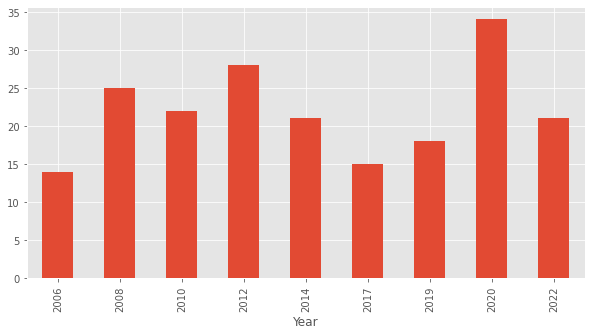

In [15]:
ts = tswift.groupby('Year').count().get('Album')
ts.plot(kind='bar')


Use the plot to determine the year with the most songs. After looking at the plot, store the year in the variable `year_with_most_songs` by manually typing it in, as an int.

<!--
BEGIN QUESTION
name: q1_2
points: 1
-->

In [16]:
year_with_most_songs = 2020
year_with_most_songs

2020

In [17]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Taylor Swift actually released two albums, sometimes called sister albums 👯, in the `year_with_most_songs`. Use code to find out which two albums were released that year. Specifically, set `sister_albums` to an array containing the names of these albums as strings, in any order. Do not type in the album names manually; write code to get them for you.

***Hint:*** The Series method `.unique()` might be helpful.

<!--
BEGIN QUESTION
name: q1_3
points: 1
-->

In [18]:
sister_albums = tswift[tswift.get('Year')==year_with_most_songs].get('Album').unique()
sister_albums

array(['folklore', 'evermore'], dtype=object)

In [19]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Create a visualization *or* write code to answer the following question:

> Which album has the most songs?

Save the name of the album as `most_songs_album`. If you create a visualization to answer the question, it's fine to hardcode the answer as a string; if you write code to answer the question, it's fine to assign `most_songs_album` to an expression that evaluates to a string.

<!--
BEGIN QUESTION
name: q1_4
points: 1
-->

In [20]:
most_songs_album = tswift.groupby('Album').count().sort_values(by='Year').reset_index().iloc[-1].get('Album')
most_songs_album

'Red'

In [21]:
grader.check("q1_4")

q1_4 results: All test cases passed!

The `'Popularity'` column in `tswift` contains a number, on a scale of 0 to 100, that ranks how popular a track is relative to other tracks on Spotify. Every stream, save, share, like, and playlist recommendation contributes to a song's `'Popularity'`. Songs with a higher `'Popularity'` are more likely to be recommended to new listeners and added to algorithmically-generated playlists.

**Question 1.5.** What are the most and least popular Taylor Swift songs right now? Save your answers as `most_pop` and `least_pop`, respectively.

<!--
BEGIN QUESTION
name: q1_5
points: 1
-->

In [22]:
most_pop = tswift.sort_values(by='Popularity').iloc[-1].get('Song Name')
least_pop = tswift.sort_values(by='Popularity').iloc[0].get('Song Name')

print(f'The most popular Taylor Swift song right now is {most_pop}.')
print(f'The least popular Taylor Swift song right now is {least_pop}.')

The most popular Taylor Swift song right now is Cruel Summer.
The least popular Taylor Swift song right now is A Perfectly Good Heart.


In [23]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** ⭐⭐ Create a DataFrame named `popularity_by_year` that is indexed by `'Year'` and has two columns:
- `'Max_Popularity'` should contain the highest popularity among all songs released that year.
- `'Median_Popularity'` should contain the median popularity of all songs released that year. 

<!--
BEGIN QUESTION
name: q1_6
points: 2
-->

In [24]:
py = tswift.groupby('Year').max()
py = py.assign(Max_Popularity=py.get('Popularity'))
#popularity_by_year = popularity_by_year.assign(Max_Popularity=popularity_by_year.get('Popularity')).drop(columns=['Popularity'])
popularity_by_year = py.get('Popularity').reset_index()
popularity_by_year = popularity_by_year.assign(Max_Popularity=popularity_by_year.get('Popularity')).drop(columns=['Popularity'])
popularity_by_year

,Year,Max_Popularity
0,2006,77
1,2008,87
2,2010,88
3,2012,87
4,2014,92
5,2017,91
6,2019,99
7,2020,92
8,2022,93


In [25]:
pm = tswift.groupby('Year').median().get('Popularity').reset_index()
pm

,Year,Popularity
0,2006,61.0
1,2008,69.0
2,2010,79.0
3,2012,73.5
4,2014,81.0
5,2017,82.0
6,2019,81.5
7,2020,74.0
8,2022,79.0


In [26]:
popularity_by_year = popularity_by_year.assign(Median_Popularity=pm.get('Popularity')).set_index('Year')
popularity_by_year

,Max_Popularity,Median_Popularity
Year,,
2006,77,61.0
2008,87,69.0
2010,88,79.0
2012,87,73.5
2014,92,81.0
2017,91,82.0
2019,99,81.5
2020,92,74.0
2022,93,79.0


In [27]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.7.** Create an overlaid line plot showing how the `'Max_Popularity'` and `'Median_Popularity'` are related to `'Year'`. Give your plot an appropriate title.

<!--
BEGIN QUESTION
name: q1_7
manual: true
points: 1
-->

<AxesSubplot:ylabel='Year'>

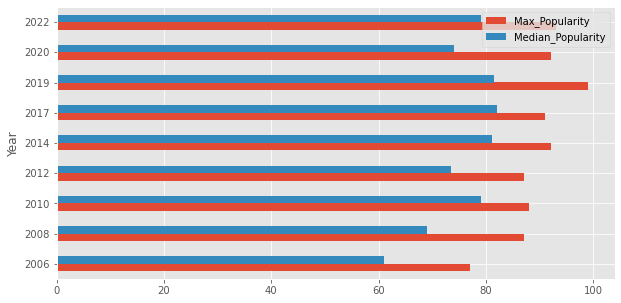

In [28]:
popularity_by_year.get(['Max_Popularity', 'Median_Popularity']).plot(kind='barh')

<!-- END QUESTION -->



**Question 1.8.** Let's explore the relationship between different variables in the `tswift` dataset. Specifically:
- `'Loudness'` is the average loudness of a track measured on a relative scale in decibels. Values typically range between -60 (softer) and 0 (louder).
- `'Energy'` is a 0 to 1 scale of a track's activity and intensity, where higher values are more energetic.

In the cell below, create a plot that shows the relationship between `'Loudness'` (on the horizontal axis) and `'Energy'` (on the vertical axis) in Taylor Swift's songs. Include an appropriate title. We've included some additional code to draw the best-fitting line to describe the relationship between these variables. We'll learn more about best-fitting lines when we study regression later in the course!

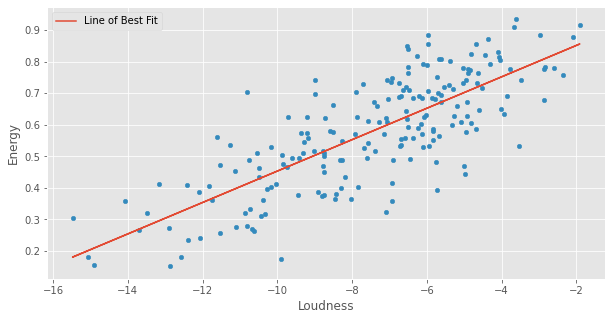

In [29]:
tswift.plot(kind='scatter', x='Loudness', y='Energy')

# The code below plots the line of best fit; do not alter it!
x = tswift.get('Loudness')
y = tswift.get('Energy')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, label='Line of Best Fit')        
plt.legend()
plt.show()

What is the relationship between `'Loudness'` and `'Energy'` for Taylor Swift's songs? Set `q1_8` to either 1, 2, or 3, corresponding to your choice from the options below. 

1. Louder songs tend to be higher in energy.
1. Louder songs tend to be lower in energy.
1. There is no clear relationship between `'Loudness'` and `'Energy'`.

<!--
BEGIN QUESTION
name: q1_8
points: 1
-->

In [30]:
q1_8 = 1

In [31]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Another one of Spotify's audio features is `'Valence'`, which measures the positivity, or "happiness", of a track on a 0 to 1 scale. Larger values correspond to more positive songs.

In the cell below, create a plot that shows the relationship between `'Valence'` (on the horizontal axis) and `'Popularity'` (on the vertical axis) in Taylor Swift's songs. Include an appropriate title. As in the previous question, we've included code to plot the best-fitting line.

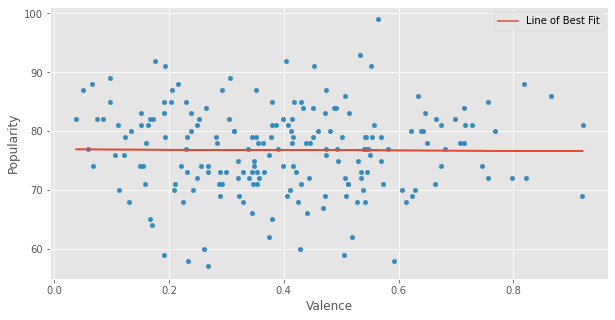

In [32]:
tswift.plot(kind='scatter', x='Valence', y='Popularity')

# The code below plots the line of best fit; do not alter it!
x = tswift.get('Valence')
y = tswift.get('Popularity')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, label='Line of Best Fit')        
plt.legend()
plt.show()

What is the relationship between `'Valence'` and `'Popularity'` for Taylor Swift's songs? Set `q1_9` to either 1, 2, or 3, corresponding to your choice from the options below.

1. Positive songs tend to be more popular.
1. Positive songs tend to be less popular.
1. There is no clear relationship between `'Valence'` and `'Popularity'`.

<!--
BEGIN QUESTION
name: q1_9
points: 1
-->

In [33]:
q1_9 = 3

In [34]:
grader.check("q1_9")

q1_9 results: All test cases passed!

**Question 1.10.** Create a plot that visualizes the distribution of `'Valence'` for all of Taylor Swift's songs. Include an appropriate title.

<AxesSubplot:title={'center':'Distribution of Valence of Taylor Swift song'}, xlabel='count', ylabel='URI'>

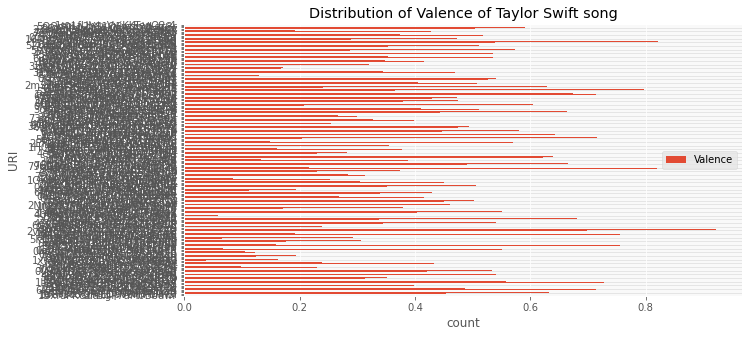

In [35]:
# Create your plot here.
tswift.plot(kind='barh', y='Valence', xlabel='count', title='Distribution of Valence of Taylor Swift song')


Are Taylor Swift's songs more positive or negative on average?  Set `q1_10` to either 1 or 2, corresponding to your choice from the options below.

1. Taylor Swift's songs are more positive on average.
2. Taylor Swift's songs are more negative on average.

<!--
BEGIN QUESTION
name: q1_10
points: 1
-->

In [36]:
q1_10 = 1

In [37]:
grader.check("q1_10")

q1_10 results: All test cases passed!

In the `tswift` DataFrame, the `'Mode'` of a song is 1 if the song is written in a major key or 0 if it's written in a minor key. Generally, songs in a major key (e.g. G major) sound more upbeat, bright, and fun, while songs in a minor key (e.g. D minor) sound more dark, sad, or serious.

For example, the song `'Shake It Off'`, from the album `'1989'`, has a `'Mode'` of 1 because it was written in G major. Run the cell below and press play to hear a snippet of it right here in your notebook.

In [38]:
play_spotify('3fthfkkvy9av3q3uAGVf7U')

On the other hand, the song `'Look What You Made Me Do'`, from the album `'Reputation'`, has a `'Mode'` of 0 because it was written in A minor. Again, run the cell below and press play to hear a snippet of it.

In [39]:
play_spotify('1P17dC1amhFzptugyAO7Il')

**Question 1.11.** ⭐⭐ Create a plot that shows the number of songs in a minor key on each album, but **only among albums with at least two songs in a minor key**. Make sure your plot has a title and a legend that accurately describe what is being shown.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_11
points: 2
manual: true
-->

<AxesSubplot:title={'center':'number of songs in a minor key on each album'}, xlabel='Count', ylabel='Album'>

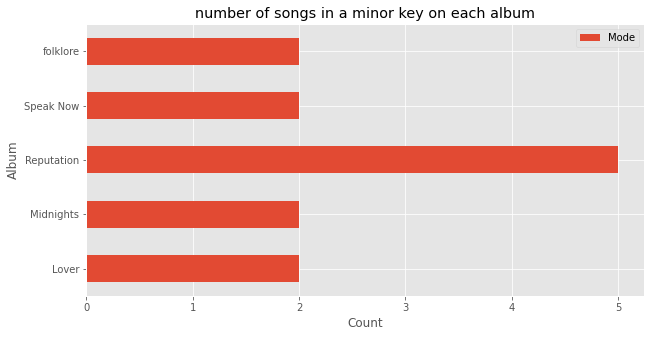

In [40]:
# Create your plot here.
alb = tswift[tswift.get('Mode') == 0].groupby('Album').count()
alb = alb[alb.get('Mode') >= 2]
alb.plot(kind='barh', y='Mode', xlabel='Count', legend=True, title='number of songs in a minor key on each album')

<!-- END QUESTION -->

**Question 1.12.** Next, let's explore how certain audio features differ from one album to another. Since we only have audio features for songs, not albums, we'll calculate the values of an audio feature for an album by averaging the values of that audio feature across all songs on the album. For example, to compute the `'Energy'` of the `'Midnights'` album, we would compute the mean `'Energy'` of all songs on the `'Midnights'` album.

Below, complete the implementation of the function `sort_albums_by`, which takes in the column name of an audio feature (e.g. `'Energy'`) and returns an array of the names of all ten Taylor Swift albums, with the albums sorted in descending order of the given feature. For example, `sort_albums_by('Energy')` would return an array whose first element is the name of the album with the highest mean `'Energy'` across all its songs.

<!--
BEGIN QUESTION
name: q1_12
points: 1
-->

In [41]:
def sort_albums_by(feature):
    sort_alb = tswift.groupby('Album').mean().sort_values(by=feature, ascending=False).reset_index().get('Album').to_numpy()
    return sort_alb

In [42]:
s = sort_albums_by('Energy')
s

array(['1989', 'Taylor Swift', 'Speak Now', 'Fearless', 'Red',
       'Reputation', 'Lover', 'evermore', 'Midnights', 'folklore'],
      dtype=object)

In [43]:
grader.check("q1_12")

q1_12 results: All test cases passed!

Now, run the cell below to see how the albums rank for each audio feature.

In [44]:
features = ['Popularity', 'Explicit', 'Danceability', 'Energy', 'Loudness',
            'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
            'Valence', 'Duration_ms', 'Tempo']

for feature in features:
    # These lines display the output nicely. You don't need to understand how they work.
    display(Markdown(f"Taylor Swift albums, in descending order of `'{feature}'`:"))
    display(Markdown("- " + ", ".join(sort_albums_by(feature))))

Taylor Swift albums, in descending order of `'Popularity'`:

- Reputation, Lover, 1989, Speak Now, Midnights, folklore, Red, evermore, Fearless, Taylor Swift

Taylor Swift albums, in descending order of `'Explicit'`:

- evermore, Midnights, folklore, Red, 1989, Fearless, Lover, Reputation, Speak Now, Taylor Swift

Taylor Swift albums, in descending order of `'Danceability'`:

- Lover, Reputation, 1989, Midnights, Red, folklore, Taylor Swift, Speak Now, Fearless, evermore

Taylor Swift albums, in descending order of `'Energy'`:

- 1989, Taylor Swift, Speak Now, Fearless, Red, Reputation, Lover, evermore, Midnights, folklore

Taylor Swift albums, in descending order of `'Loudness'`:

- Speak Now, Taylor Swift, Fearless, Red, 1989, Reputation, Lover, evermore, folklore, Midnights

Taylor Swift albums, in descending order of `'Speechiness'`:

- Lover, Midnights, Reputation, evermore, 1989, Red, folklore, Speak Now, Fearless, Taylor Swift

Taylor Swift albums, in descending order of `'Acousticness'`:

- evermore, folklore, Midnights, Lover, Taylor Swift, Fearless, Speak Now, Red, Reputation, 1989

Taylor Swift albums, in descending order of `'Instrumentalness'`:

- Midnights, evermore, 1989, Lover, folklore, Red, Taylor Swift, Reputation, Fearless, Speak Now

Taylor Swift albums, in descending order of `'Liveness'`:

- Taylor Swift, Fearless, Reputation, 1989, Midnights, Speak Now, Red, Lover, evermore, folklore

Taylor Swift albums, in descending order of `'Valence'`:

- Lover, Red, evermore, Fearless, Taylor Swift, 1989, Speak Now, folklore, Reputation, Midnights

Taylor Swift albums, in descending order of `'Duration_ms'`:

- Speak Now, Red, Fearless, evermore, folklore, Reputation, 1989, Taylor Swift, Midnights, Lover

Taylor Swift albums, in descending order of `'Tempo'`:

- Fearless, Speak Now, Reputation, Taylor Swift, evermore, 1989, Lover, folklore, Red, Midnights

**Question 1.13.** Let's look closely at one result from above, duplicated below. Recall that `'Explicit'` is a Boolean variable that determines whether the song includes explicit words. 🤬

In [45]:
display(Markdown(f"Taylor Swift albums, in descending order of `'Explicit'`:"))
display(Markdown("- " + ", ".join(sort_albums_by('Explicit'))))

Taylor Swift albums, in descending order of `'Explicit'`:

- evermore, Midnights, folklore, Red, 1989, Fearless, Lover, Reputation, Speak Now, Taylor Swift

What can you conclude based only on the information displayed by the cell above? Assign a list with the numbers of all the true statements to the variable `q1_13`.

1. There are more explicit words in `'evermore'` than in `'Midnights'`. 
2. A higher fraction of songs on `'evermore'` use explicit words than on `'Midnights'`.
3. There are more songs that use explicit words in `'evermore'` than on `'Midnights'`.
4. If you randomly select a song from `'evermore'`, the probability it contains explicit words exceeds the probability that a randomly selected song from `'Midnights'` contains explicit words. 

<!--
BEGIN QUESTION
name: q1_13
points: 1
-->

In [46]:
q1_13 = []

In [47]:
grader.check("q1_13")

q1_13 results: All test cases passed!

**Question 1.14.** ⭐⭐ While Taylor Swift is primarily a solo artist, she has collaborated with other artists on a number of songs. For example, she featured Lana Del Rey in the song `'Snow On The Beach (Ft. Lana Del Rey)'` and HAIM in `'no body, no crime (Ft. HAIM)'`. All the collaborative songs in `tswift` are indicated by `'Ft.'` in the name of the song, just like in these examples.

Create an overlaid vertical bar chart that allows you to compare the average values of `'Explicit'`, `'Danceability'` and `'Acousticness'` for collaborative songs versus solo songs. Make sure your plot has a title and a legend that accurately describes what is being shown.

***Note:*** There is more than one way you can approach this question. Any bar chart that allows you to compare the desired quantities will work!

<AxesSubplot:title={'center':'Average values of Explicit, Danceability, and Acousticness for collaborative songs versus solo songs'}, xlabel='Collaborative'>

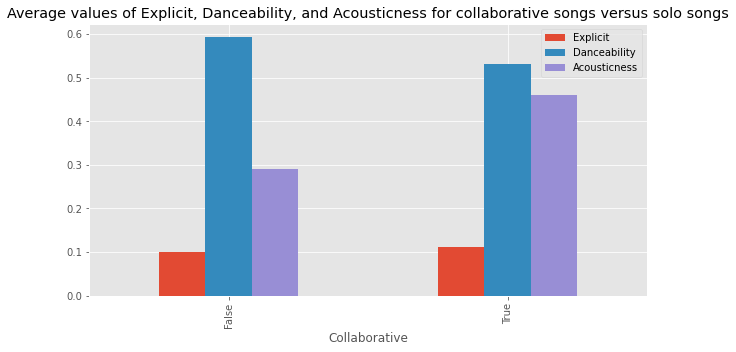

In [48]:
# Create your plot here.
collab = tswift.assign(Collaborative=tswift.get('Song Name').str.contains('Ft.'))
collab = collab.groupby('Collaborative').mean()
collab.get(['Explicit', 'Danceability', 'Acousticness']).plot(kind='bar', legend=True, title='Average values of Explicit, Danceability, and Acousticness for collaborative songs versus solo songs')

Do collaborative songs have higher values of `'Explicit'`, `'Danceability'`, and `'Acousticness'` than solo songs, on average? Assign a list with the numbers of all the true statements to the variable `q1_14`.

1. Collaborative songs have a higher value of `'Explicit'` than solo songs, on average.
1. Collaborative songs have a higher value of `'Danceability'` than solo songs, on average.
1. Collaborative songs have a higher value of `'Acousticness'` than solo songs, on average.

<!--
BEGIN QUESTION
name: q1_14
points: 2
-->

In [49]:
q1_14 = [1, 3]

In [50]:
grader.check("q1_14")

q1_14 results: All test cases passed!

<a id='section2'></a>
## Section 2: Song Recommender 🎧

> Your favorite song was playing from the far side of the gym.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll create a Taylor Swift song recommender tool. The tool will allow you to input a song you like, selected from a collection of popular songs  on Spotify, and it will recommend to you the songs in Taylor Swift's body of work that are most similar to your input song.

We are already familiar with the `tswift` DataFrame; this contains the Taylor Swift songs from which we will make our recommendations.  

We will also use a separate dataset of allowed input songs. For this, we have a collection of popular songs with more than one billion streams on Spotify. Let's load in this data and store it in the DataFrame `billions_club`. `billions_club` contains all the same columns as `tswift`, except that it doesn't have a `'Year'` column, and it has an additional column named `'Artist'`, because it includes songs by a variety of artists.

In [51]:
billions_club = bpd.read_csv('data/billions_club.csv').set_index('URI')
billions_club

,Album,Song Name,Artist,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
URI,,,,,,,,,,,,,,,,,,,,
1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,Taylor Swift,1,3,91,False,0.359,0.543,7,-7.582,1,0.0919,0.492000,0.000016,0.1180,0.453,68.534,221307,4
2QfznFotJNZmnIEYFdzE5T,Heartbreak Anniversary,Heartbreak Anniversary,Giveon,1,1,73,False,0.624,0.457,0,-8.876,1,0.0494,0.557000,0.000000,0.1280,0.586,129.758,196795,4
5XeFesFbtLpXzIVDNQP22n,AM,I Wanna Be Yours,Arctic Monkeys,1,12,95,False,0.464,0.417,0,-9.345,0,0.0256,0.136000,0.022000,0.0974,0.479,67.528,183956,4
2dHHgzDwk4BJdRwy9uXhTO,HEROES & VILLAINS,Creepin' (with The Weeknd & 21 Savage),Metro Boomin; The Weeknd; 21 Savage,1,10,92,True,0.715,0.620,1,-6.005,0,0.0484,0.417000,0.000000,0.0822,0.172,97.950,221520,4
5W8YXBz9MTIDyrpYaCg2Ky,Infest,Last Resort,Papa Roach,1,2,83,True,0.589,0.890,4,-3.719,0,0.0603,0.000481,0.000820,0.2010,0.692,90.598,199907,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3s4U7OHV7gnj42VV72eSZ6,Rather Be (feat. Jess Glynne),Rather Be (feat. Jess Glynne),Clean Bandit; Jess Glynne,1,1,75,False,0.799,0.586,11,-6.735,1,0.0377,0.162000,0.000002,0.1930,0.549,120.970,227833,4
6zeeWid2sgw4lap2jV61PZ,Suncity,Better,Khalid,1,6,75,False,0.596,0.552,0,-10.278,0,0.0970,0.076500,0.334000,0.1040,0.112,97.949,229320,4
2yPoXCs7BSIUrucMdK5PzV,Good Girl Gone Bad,Umbrella,Rihanna; JAY-Z,1,1,74,False,0.583,0.829,1,-4.603,1,0.1340,0.008640,0.000000,0.0426,0.575,174.028,275987,4


The goal in this section is to find a song in the `billions_club` DataFrame that we like and use it as an input to our recommender tool to find Taylor Swift songs with a similar sound. The problem is, in the preview of the DataFrame above, we can only see the first few rows and the last few rows of `billions_club`, so it's hard to see all of the possible songs we can choose from. Let's browse the DataFrame by randomly selecting ten rows to display. 

In [52]:
# Run this cell a few times!
billions_club.sample(10).get(['Song Name', 'Artist'])

,Song Name,Artist
URI,,
6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny; Chencho Corleone
1A8j067qyiNwQnZT0bzUpZ,This Girl (Kungs Vs. Cookin' On 3 Burners),Kungs; Cookin' On 3 Burners
3V8UKqhEK5zBkBb6d6ub8i,Te Boté - Remix,Nio Garcia; Casper Magico; Bad Bunny; Darell; ...
2gMXnyrvIjhVBUZwvLZDMP,Before You Go,Lewis Capaldi
5FVd6KXrgO9B3JPmC8OPst,Do I Wanna Know?,Arctic Monkeys
7GgWAITsYJaRM3r50rfh5w,When We Were Young,Adele
561jH07mF1jHuk7KlaeF0s,Mockingbird,Eminem
4RvWPyQ5RL0ao9LPZeSouE,Everybody Wants To Rule The World,Tears For Fears
2VxeLyX666F8uXCJ0dZF8B,Shallow,Lady Gaga; Bradley Cooper


**Question 2.1.** Run the previous cell a few times until you find a song you like; you'll use this song as the input to the recommender tool. Record the `'URI'` of your favorite song in the variable `favorite_uri`. You should just input this value manually based on what you find from browsing the DataFrame. (You can double-click a value in the index to highlight it, and then copy and paste it below.)

Then, using code, find the `'Song Name'` of this song and save it in the variable `favorite_song_name`.

<!--
BEGIN QUESTION
name: q2_1
points: 1
-->

In [53]:
favorite_uri = '1dGr1c8CrMLDpV6mPbImSI'
favorite_song_name = billions_club.loc[favorite_uri].get('Song Name')

print(f'My favorite song is {favorite_song_name}. It has a URI of {favorite_uri}.')

My favorite song is Lover. It has a URI of 1dGr1c8CrMLDpV6mPbImSI.


In [54]:
grader.check("q2_1")

q2_1 results: All test cases passed!

You can also listen to a preview of your favorite song in the notebook by running the cell below and pressing play.

In [55]:
play_spotify(favorite_uri) 

We will allow our recommender tool to base its recommendations on a customizable set of audio features. When not specified, the tool will use *all* of the audio features that are measured on a 0 to 1 scale, which we'll store in the variable `default_features`. But you can choose to use only a subset of these features when asking for recommendations, based on whatever is important to you!

In [56]:
default_features = [
    'Danceability', 
    'Energy',
    'Speechiness',
    'Acousticness',
    'Instrumentalness',
    'Liveness',
    'Valence'
]

Let's start building our recommender tool! 

The first step of the process is to extract the features of our favorite song from a DataFrame of songs. The thing is, each song is stored as a row of a DataFrame, and we don't have any experience accessing full rows of DataFrames. We typically access entire columns of data using `.get`, but we've never needed to access whole rows before. 

It turns out that the `.loc` accessor that we've used on Series also works on DataFrames. If we use `.loc` directly on a DataFrame, we can extract the contents of an individual row as a Series. When all the values in a row are of the same data type, we can then convert that Series into an array. 

For example, the next cell creates a small example DataFrame.

In [57]:
example_df = bpd.DataFrame().assign(x=[1, 2], y=[3, 4], z=[5, 6])
example_df

,x,y,z
0,1,3,5
1,2,4,6


We can extract the values from the second row of `example_df` as follows.

In [58]:
example_df.loc[1]

x    2
y    4
z    6
Name: 1, dtype: int64

Notice that this is a Series whose index values are the column names of `example_df`. If we want to work with the values in this Series an array, we can convert the Series to an array.

In [59]:
np.array(example_df.loc[1])

array([2, 4, 6])

**Question 2.2.** Use what you just learned about accessing rows to complete the implementation of the function `get_feature_values`. The inputs to `get_feature_values` are:
- `input_uri`, the `'URI'` of a song whose features you want to extract as an array.
- `song_df`, a DataFrame that has a row corresponding to the song with the given `input_uri` and columns containing audio features.
- `feature_list`, a list of features to extract.

It should return an **array** containing the values of the specified features for the song, in the order that they appear in `feature_list`. If there is no song with the given `input_uri` in `song_df`, the function should print `'This URI was not found.'` and return `None`. (`None` is a special Python keyword; it should not go in quotes, and it will turn green when you type it.)

Example behavior is given below.

```py
# This URI corresponds to the song "Creepin' (with The Weeknd & 21 Savage)".
# Query for it in billions_club; you'll see that its 'Valence', 'Instrumentalness', and 'Energy'
# match the values in the array below.
>>> get_feature_values('2dHHgzDwk4BJdRwy9uXhTO', billions_club, ['Valence', 'Instrumentalness', 'Energy'])
array([0.172, 0.   , 0.62 ])
```

After implementing your function, use it to extract some audio features from your favorite song in `billions_club`, whose `'URI'` was stored in `favorite_uri`. You can use any of the audio features in `default_features` that you like.

***Hint:*** Use the `in` keyword to check if `input_uri` is a valid `'URI'`. 

***Note:*** We're writing a very general function that allows `song_df` to be any DataFrame of songs. For now, we'll only call the function with `billions_club` as `song_df`, but later in this section, we'll see how to use the function with `song_df` set to something else.

<!--
BEGIN QUESTION
name: q2_2
points: 1
-->

In [60]:
def get_feature_values(input_uri, song_df, feature_list):
    if (input_uri in song_df.index):
        temp = song_df.loc[input_uri].get(feature_list).apply(lambda x: round(x, 3))
        #print(temp)
        return temp.to_numpy()
    else:
        print('This URI was not found.')
        return None        
# Now call your function to extract some audio features of your favorite song.
get_feature_values(favorite_uri, billions_club, ['Danceability', 'Energy'])

array([0.359, 0.543])

In [61]:
grader.check("q2_2")

q2_2 results: All test cases passed!

We now know how to extract the features of a song (as an array) from a DataFrame using `get_feature_values`. But, what will we do with this feature array once we extract it? We'll want to compare the features of our song to the features of each Taylor Swift song to identify the Taylor Swift songs that are most similar to the song we selected. Since each audio feature is numerical, we need a way to compare two arrays of numbers and measure the similarity between them.

For this, we'll use the Euclidean distance, which you may know more simply as just "distance". Euclidean distance is a fundamental concept in mathematics (more specifically, geometry) used to measure how far away two points are. We're most familiar with this concept in two dimensions, where it corresponds to the distance between two points in the plane. Here is the distance formula in two dimensions:

<p style="text-align: center;"><strong>Distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ in 2 dimensions:</strong></p>

<p style="text-align: center;">$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$</p>

<img src="data/images/distance.png" width=30%>

The picture above shows that the distance formula is really an application of the Pythagorean theorem relating the side lengths of a right triangle: $c^2 = a^2 + b^2$.

However, Euclidean distance is not limited to two dimensions; it can be generalized to more dimensions. In general, in $n$-dimensional space (where $n$ can be any positive integer), we can generalize the Euclidean distance formula as follows:

<p style="text-align: center;"><strong>Distance between two points $(x_1, x_2, \ldots, x_n)$ and $(y_1, y_2, \ldots, y_n)$ in $n$ dimensions:</strong></p>
 
<p style="text-align: center;">$d = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_n - y_n)^2}$</p>

What can we do with this? For our application, let's think of the feature array for a given song as a point in $n$-dimensional space. For example, if the features we care about are `['Valence', 'Acousticness', 'Energy']`, then for any given song, we have a point in 3-dimensional space. Then, to measure how similar two songs are, we can compute the Euclidean distance between their two points in 3-dimensional space. **The closer this distance is to 0, the more similar the two songs are!**

For instance, suppose we want to compute the similarity between the songs `'Bad Blood'` by `'Taylor Swift'` and `'What Makes You Beautiful'` by `'One Direction'` using the aforementioned three features. Using `get_feature_values`:
- `'Bad Blood'` has the feature array `np.array([0.287, 0.0885, 0.794])`, and
- `'What Makes You Beautiful'` has the feature array `np.array([0.888, 0.009, 0.787])`.

Then, the Euclidean distance between the two songs' points is:

$$\sqrt{(0.287 - 0.888)^2 + (0.0855 - 0.009)^2 + (0.794 - 0.787)^2} = 0.606275...$$

**Question 2.3.** ⭐⭐ Now, let's apply the concept of Euclidean distance to calculate the similarity between two songs. Complete the implementation of the function `calculate_similarity` below. This function takes in two arrays of the same length, which we can think of as two points in $n$-dimensional space, where $n$ is the length of each array. The function should output the Euclidean distance between these two points, as a float, with no rounding.

Example behavior is given below.

```py
# Note: We've hard-coded the inputs to calculate_similarity just for this example;
# typically, you'll find feature arrays by calling your get_feature_values function.
>>> calculate_similarity(np.array([0.287, 0.0885, 0.794]), np.array([0.888, 0.009, 0.787]))
0.6062757211038555
```

Then, use both the `calculate_similarity` and the `get_feature_values` functions you've defined to calculate the similarity (Euclidean distance) between your favorite song and the Taylor Swift song `'Karma'`, based on the features `'Danceability'`, `'Energy'`, `'Valence'`, and `'Acousticness'`. Store your result in `favorite_vs_karma`. 

<!--
BEGIN QUESTION
name: q2_3
points: 2
-->

In [62]:
def calculate_similarity(features_1, features_2):
    #a1 = np.array(features_1)
    #a2 = np.array(features_2)
    distance = np.linalg.norm(features_1 - features_2)
    return distance

feature_list = ['Danceability', 'Energy', 'Valence', 'Acousticness']
song_1 = get_feature_values(favorite_uri, billions_club, feature_list)
song_1

array([0.359, 0.543, 0.453, 0.492])

In [63]:
Karma_uri = tswift[tswift.get('Song Name') == 'Karma'].reset_index().get('URI').iloc[0]
song_2 = get_feature_values(Karma_uri, tswift, feature_list)
song_2

array([0.642, 0.62 , 0.097, 0.073])

In [64]:
favorite_vs_karma = calculate_similarity(song_1, song_2)
favorite_vs_karma

0.6231492598085951

In [65]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** ⭐⭐ So far, we know how to compute the similarity between two particular songs. Now, let's extend what we've learned to compute the similarity between a given song and *each* of the Taylor Swift songs in `tswift`. 

Use the two functions you've defined so far in this section (`get_feature_values` and `calculate_similarity`) to complete the implementation of the function `calculate_similarity_for_all`. This function should calculate the similarity scores between the input song and each of the Taylor Swift songs in `tswift`, one by one, and output an array of similarity scores.  The inputs to `calculate_similarity_for_all` are:

- `input_uri`, the `'URI'` of a song whose features you will compare to each song in `tswift`.
- `song_df`, a DataFrame that has a row corresponding to the song with the given `input_uri` and columns containing audio features.
- `feature_list`, a list of features to include in the similarity score.

Make sure your output array has the similarities of all songs in the order they appear in the `tswift` DataFrame. For example, if the first song in `tswift` is `'Anti-Hero'` (it may not be), then the first element of your output array should be the similarity between the input song and `'Anti-Hero'`.

While we don't normally iterate through DataFrames, Series, or indexes, in this question, you should use a `for`-loop to iterate through the values in the index of `tswift`, extracting the features from one Taylor Swift song at a time and using those features to compute the similarity with the input song.

A sample function call is provided. Feel free to try other example inputs.
<!--
BEGIN QUESTION
name: q2_4
points: 2
-->

In [66]:
def calculate_similarity_for_all(input_uri, song_df, feature_list):
    input_feature = get_feature_values(input_uri, song_df, feature_list)
    similarity_scores = []
    for t_uri in tswift.index:
        #tswift[tswift.get('Song Name') == 'Karma'].reset_index().get('URI').iloc[0]
        tf = get_feature_values(t_uri, tswift, feature_list)
        similarity_scores.append(calculate_similarity(input_feature, tf))
    return np.array(similarity_scores)

# Feel free to comment this line out or change the arguments!
calculate_similarity_for_all(favorite_uri, billions_club, ['Danceability', 'Energy', 'Valence', 'Acousticness'])

array([0.46419392, 0.        , 0.62655726, 0.79653311, 0.69823921,
       0.59150402, 0.42025349, 0.54809215, 0.47560803, 0.65702055,
       0.60802138, 0.59019658, 0.42588026, 0.51387644, 0.74527243,
       0.43581418, 0.71847964, 0.55591906, 0.47405485, 0.62314926,
       0.44943186, 0.57628639, 0.38573048, 0.54692321, 0.56499735,
       0.67866781, 0.67032679, 0.41198301, 0.48822843, 0.49939563,
       0.61400814, 0.50377376, 0.60084773, 0.34181574, 0.59884389,
       0.52297323, 0.47658158, 0.38960364, 0.36630861, 0.58436889,
       0.36471633, 0.65781608, 0.62737708, 0.56648213, 0.64996   ,
       0.67934527, 0.52253899, 0.69127274, 0.77173376, 0.66847962,
       0.53557913, 0.56984472, 0.46904264, 0.6609478 , 0.54962351,
       0.53345946, 0.57429087, 0.65136933, 0.45468011, 0.22180622,
       0.20234871, 0.27854802, 0.45020773, 0.59875371, 0.31310861,
       0.55078943, 0.49563999, 0.24937923, 0.46307883, 0.31044645,
       0.43095707, 0.4765522 , 0.4899653 , 0.3286381 , 0.59233

In [67]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Now that we have the similarity scores between our input song and every single Taylor Swift song, let's use them to find the Taylor Swift songs that are most similar to our input song. Complete the implementation of the function `select_top_recommendations`, which takes in an array `similarity_scores`, like the one you just created, and a positive integer `n`. The function should return a DataFrame of the `n` songs from `tswift` that correspond to the `n` **lowest** values in `similarity_scores`, sorted in increasing order of similarity score.
- Remember, the most similar songs are the ones whose similarity scores are lowest, because songs are more similar when they have a lower Euclidean distance.
- The DataFrame returned by `select_top_recommendations` should have all the same columns as `tswift`, though as mentioned above, it should only have `n` rows.

***Hint:*** You may want to add a new column to your DataFrame containing the contents of `similarity_scores`. Make sure to drop this column at the end, so that your output DataFrame has exactly `n` rows and 20 columns.
<!--
BEGIN QUESTION
name: q2_5
points: 1
-->

In [68]:
def select_top_recommendations(similarity_scores, n):
    temp = tswift.assign(similarity_scores=similarity_scores)
    temp = temp.sort_values(by='similarity_scores', ascending=True).drop(columns=['similarity_scores'])
    return temp.iloc[:n]

In [69]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6.** It's time to combine everything we've implemented so far into a single function. Below, complete the 
implementation of the function `song_recommender`. The inputs to `song_recommender` are:

- `input_uri`, the `'URI'` of a song which you want to find recommendations similar to.
- `song_df`, a DataFrame that has a row corresponding to the song with the given `input_uri` and columns containing audio features.
- `n`, the number of top-matching songs to be shown.
- `feature_list`, a list of features to include in the similarity computation. This is an optional parameter; if not included, the similarity should be based on all features in `default_features`. 
 
The output should be an `n`-row DataFrame whose index contains `'URI'`s and whose only columns are `'Album'`, `'Song Name'`, and the columns included in `feature_list`. Each row in the returned DataFrame should correspond to a song; the songs should be sorted in decreasing order of similarity (that is, in increasing order of similarity score – the same way that the rows are ordered in the output of `select_top_recommendations`).

***Note:*** In the signature of the `song_recommender` function, we set `feature_list=default_features`. This tells Python that `feature_list` is an optional parameter, and if omitted, it should be set to `default_features`. We use functions with default parameter values all the time - for example, in the DataFrame method `.sort_values`, when we don't set the parameter `ascending`, it defaults to having a value of `True`. 

***Hints:***
- You've done most of the work already. It's possible to solve this problem in one (long) line of code. We say this not to encourage you to write one long line of code, but to emphasize that you don't need to write a ton of code within the body of `song_recommender`.
- The `+` symbol, when placed between two lists, concatenates the lists, just like when the `+` symbol is placed between two strings, it concatenates the strings. This will be useful when making sure that your output DataFrame has only certain columns.
<!--
BEGIN QUESTION
name: q2_6
points: 1
-->

In [70]:
def song_recommender(input_uri, song_df, n, feature_list=default_features):
    sim = calculate_similarity_for_all(input_uri, song_df, feature_list)
    #fl = feature_list.append(['Album', 'Song Name'])
    temp = select_top_recommendations(sim, n).get(['Album', 'Song Name'] + feature_list)
    return temp 
    
# The following call to song_recommender finds the 5 Taylor Swift songs
# that are most similar to your chosen song, in terms of 'Danceability' and 'Energy'.
# We've also include a print statement to help you interpet the output.
print(f'Taylor Swift songs that are most similar to {favorite_song_name}:')
song_recommender(favorite_uri, billions_club, 5, ['Danceability', 'Energy'])

Taylor Swift songs that are most similar to Lover:


,Album,Song Name,Danceability,Energy
URI,,,,
1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,0.359,0.543
0tQ9vBYpldCuikPsbgOVKA,Fearless,Untouchable,0.393,0.531
2gVhfX2Gy1T9kDuS9azrF7,evermore,willow,0.392,0.574
5YL553x8sHderRBDlm3NM3,Fearless,White Horse,0.423,0.517
3pHkh7d0lzM2AldUtz2x37,Lover,The Archer,0.292,0.574


In [71]:
grader.check("q2_6")

q2_6 results: All test cases passed!

Nice work! You now have the ability to pick a song you like and audio features that are important to you and use your function to get back recommendations of Taylor Swift songs that are similar to the song you chose.

But wait – it gets cooler.

The cell below is long, but it sets up an interactive widget, which allows you to choose any song in `billions_club` from a dropdown menu and plays for you the 5 most similar songs from Taylor Swift's repertoire, according to all of the features in `default_features`. Run the cell below to check it out!

In [72]:
# Run this cell. Don't change any of the code.
default = 'Bank Account by 21 Savage'

def get_and_format_recommendations(song_name):
    song, artist = song_name.split(' by ')
    row = billions_club[(billions_club.get('Song Name') == song) & (billions_club.get('Artist') == artist)]
    uri = row.index[0]
    recommendations_df = song_recommender(uri, billions_club, 5, default_features)
    display(HTML(f'<h3>The song you chose was {billions_club.get("Song Name").loc[uri]} by {billions_club.get("Artist").loc[uri]}.</h3>'))
    play_spotify(uri)
    display(HTML('<h4>Here are the 5 most similar Taylor Swift songs we found.</h4>'))
    for recommended_uri in recommendations_df.index:
        play_spotify(recommended_uri)

song_options = np.sort(billions_club.get('Song Name') + ' by ' + billions_club.get('Artist'))
song_widget = widgets.Dropdown(options=song_options, description='Song', layout={'width': '525px'}, value=default)
   
def change_rec(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget)
        get_and_format_recommendations(song_widget.value)

display(song_widget)
get_and_format_recommendations(default)
song_widget.observe(change_rec)

Dropdown(description='Song', index=26, layout=Layout(width='525px'), options=('1-800-273-8255 by Logic; Alessi…

You did all of the calculations behind-the-scenes to make this widget work – nice job!

**Question 2.7.** ⭐️⭐️ Up until now, our goal has been to find the songs in `tswift` that are most similar to our chosen song in `billions_club`. That's what the above widget does.

However, we can also use the functions we've defined to determine the similarity between any pair of songs in `tswift`, since all of the functions we've defined so far in this section take a `song_df` as an input.

To wrap up Section 2, complete the implementation of the function `most_similar_pair`, which takes in a single argument, a `feature_list`, and returns **an array of length two containing the names of the two songs in `tswift` that are the most similar to one another**, according to the features in `feature_list`. The returned array can have these two songs in either order.

Remember, the more similar two songs are, the lower their similarity score (Euclidean distance). What you need to find, then, is the pair of songs with the lowest similarity score. To do this, you'll need to find the similarity scores between all pairs of Taylor Swift songs. Make sure the two songs you find are actually different songs, and not the same song twice! 

This is a tough problem, but we've provided many hints as comments. Before writing any code, read through the comments and the structure of the provided code and try to think conceptually of the steps that need to be performed.

In [73]:
def most_similar_pair(feature_list=default_features):
    # Initialize an empty array to store the most similar pair of songs.
    # This is NOT an accumulator pattern question, where you append to pair_of_songs in a loop.
    # Instead, when you find a pair of songs that's more similar than the"most similar pair" 
    # you've ever seen, you'll update this array to contain those two songs instead.
    pair_of_songs = np.array([])
    
    # Any time you find a pair of songs that's more similar than any pair you've ever seen,
    # you should update this variable. We initialize it to 1.01 because the maximum possible
    # similarity score is 1, so we know that this variable will be updated in the first iteration
    # of the for-loop, corresponding to the most similar pair of songs we've seen so far.
    lowest_similarity_score_seen = 1.01
    
    # Loop over the URIs of Taylor Swift's songs.
    for uri in tswift.index:
        # Calculate similarities between this song and all other Taylor Swift songs.
        similarities = calculate_similarity_for_all(uri, tswift, feature_list)
        
        # Add the array of similarity scores as a column to tswift.
        # Sort the rows so that the most similar songs are at the top.
        with_similarities = tswift.assign(Similarity=similarities).sort_values(by='Similarity', ascending=True)
        
        # Every song will have a similarity score (distance) of 0 with itself,
        # so if we just take the smallest similarity score, we'll end up with two of the same song. 
        # Take the second-smallest similarity to account for this.
        current_lowest_similarity_score = with_similarities.iloc[1].get('Similarity')
        if current_lowest_similarity_score < lowest_similarity_score_seen: 
            # Update the lowest_similarity_score_seen and pair_of_songs variables.
            # Make sure to get the names of the songs from the with_similarities DataFrame.
            lowest_similarity_score_seen = current_lowest_similarity_score
            pair_of_songs = np.array([with_similarities.iloc[0].get('Song Name'), with_similarities.iloc[1].get('Song Name')])
        
    return pair_of_songs

# Once you've implemented the function, run this cell to try out an example function call.
# DON'T CHANGE the function call below, but you can make other function calls in new cells.
# It's totally fine if it takes up to a minute to run each function call.
most_similar_dance_acoustic = most_similar_pair(['Danceability', 'Acousticness'])
most_similar_dance_acoustic

array(['Getaway Car', "I'm Only Me When I'm With You"], dtype='<U29')

In [74]:
grader.check("q2_7")

q2_7 results: All test cases passed!

Let's put your hard work to good use. Run the cell below to find and play the pair of Taylor Swift songs that are most similar to one another, according to all the features in `default_features`.

In [75]:
name_1, name_2 = most_similar_pair()
uri_1 = tswift[tswift.get('Song Name') == name_1].index[0]
uri_2 = tswift[tswift.get('Song Name') == name_2].index[0]
play_spotify(uri_1)
play_spotify(uri_2)

What do you think – do they sound similar? If not, you may want to check your code!

Right before Question 2.7, you got to interact with a widget that let you choose a song from `billions_club` and played the 5 most similar Taylor Swift songs, according to all features in `default_features`. Run the cell below to see a similar widget, but where the possible song options are songs in `tswift`. This time, songs are sorted first by album in alphabetical order, then by song name in alphabetical order.

In [76]:
# Run this cell. Don't change any of the code.
default_tswift = 'Enchanted, from the album Speak Now'

def get_and_format_recommendations_tswift(song_name):
    song, album = song_name.split(', from the album ')
    
    row = tswift[(tswift.get('Song Name') == song)]
    uri = row.index[0]
    recommendations_df = song_recommender(uri, tswift, 6, default_features)
    display(HTML(f'<h3>The song you chose was {tswift.get("Song Name").loc[uri]}, from the album {tswift.get("Album").loc[uri]}.</h3>'))
    play_spotify(recommendations_df.index[0])
    display(HTML('<h4>Here are the 5 most similar <b>other</b> Taylor Swift songs we found.</h4>'))
    for recommended_uri in recommendations_df.index[1:]:
        play_spotify(recommended_uri)

by_album = tswift.sort_values(['Album', 'Disc Number', 'Track Number'])
song_options_tswift = np.array(by_album.get('Song Name') + ', from the album ' + by_album.get('Album'))
song_widget_tswift = widgets.Dropdown(options=song_options_tswift, description='Song', layout={'width': '525px'}, value=default_tswift)
   
def change_rec_tswift(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget_tswift)
        get_and_format_recommendations_tswift(song_widget_tswift.value)

display(song_widget_tswift)
get_and_format_recommendations_tswift(default_tswift)
song_widget_tswift.observe(change_rec_tswift)

Dropdown(description='Song', index=136, layout=Layout(width='525px'), options=('Welcome To New York, from the …

Awesome job! Have you found any new songs to listen to? We have... 🎶

<a id='section3'></a>
## Section 3: Lyric Searcher 🔍

> Dark side, I search for your dark side.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll create a Taylor Swift lyric searcher similar to [this online tool](https://shaynak.github.io/taylor-swift/) created by Shayna Kothari, a software engineer at Facebook. Run the next cell and try inputting some search terms to explore what it does!

In [77]:
display(IFrame(src="https://shaynak.github.io/taylor-swift", width=800, height=600))

Creating our own version of this search tool will involve multiple steps, but we'll start simple and gradually increase the complexity of our search. Our search tool will have some differences from the online tool, but it will be similar.

To implement our lyric searcher, we won't need any of the musical data in `tswift`, just lyrics of the songs themselves. At this point in the project, we'll switch our attention to the `lyrics` DataFrame.

In [78]:
lyrics

,Album,Lyrics
Song,,
Anti-Hero,Midnights,"I have this thing where I get older, but just ..."
Bejeweled,Midnights,"Baby love, I think I've been a little too kind..."
Bigger Than The Whole Sky,Midnights,No words appear before me in the aftermath\nSa...
Dear Reader,Midnights,"Dear reader, if it feels like a trap\nYou're a..."
Glitch,Midnights,We were supposed to be just friends\nYou don't...
...,...,...
Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's..."
Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...


**Question 3.1.** To start, create a DataFrame named `casually_cruel` that has the same index and columns as `lyrics` and a row for each song that has the exact string `'casually cruel'` in the lyrics.

In [79]:
casually_cruel = lyrics[lyrics.get('Lyrics').str.contains('casually cruel')]
casually_cruel

,Album,Lyrics
Song,,
All Too Well (10 Minute Version),Red,"I walked through the door with you, the air wa..."


In [80]:
grader.check("q3_1")

q3_1 results: All test cases passed!

If you search the phrase `'casually cruel'` on the lyric searcher website, or if you're a big Swiftie, you'll recognize that there's another song, `'Mr. Perfectly Fine'`, that uses this same phrase, but for some reason, it's not appearing among our search results. Try printing out the lyrics to `'Mr. Perfectly Fine'` and see if you can figure out why it doesn't appear in our `casually_cruel` DataFrame. 

In [81]:
# Why is Mr. Perfectly Fine not included? 
print(lyrics.loc['Mr. Perfectly Fine'].get('Lyrics'))

Mr. "Perfect face"
Mr. "Here to stay"
Mr. "Looked me in the eye and told me you would never go away"
Everything was right
Mr. "I've been waitin' for you all my life"
Mr. "Every single day until the end, I will be by your side"

But that was when I got to know Mr. "Change of heart"
Mr. "Leaves me all alone," I fall apart
It takes everything in me just to get up each day
But it's wonderful to see that you're okay

Hello, Mr. "Perfectly fine"
How's your heart after breakin' mine?
Mr. "Always at the right place at the right time," baby
Hello, Mr. "Casually cruel"
Mr. "Everything revolves around you"
I've been Miss Misery since your goodbye
And you're Mr. "Perfectly fine"

Mr. "Never told me why"
Mr. "Never had to see me cry"
Mr. "Insincere apology so he doesn't look like the bad guy"
He goes about his day
Forgets he ever even heard my name
Well, I thought you might be different than the rest, I guess you're all the same

'Cause I hear he's got his arm 'round a brand-new girl
I've been pick

**Question 3.2.** Now, write a function called `phrase_match_df` with one parameter, a string `phrase`. The function should return a DataFrame with the same index and columns as `lyrics`, with a row for each song that includes the given `phrase` in the lyrics, regardless of capitalization.

For example, on the input phrase of `'casually cruel'`, the function should return a DataFrame with two rows; the same two rows should be returned on the input phrase `'CASUALLY cRUEL'`.

In [82]:
def phrase_match_df(phrase):
    temp = lyrics[(lyrics.get('Lyrics').str.upper()).str.contains(phrase.upper())]
    return temp

# Feel free to the argument in the function call below to experiment!
phrase_match_df('casually cruel')

,Album,Lyrics
Song,,
All Too Well (10 Minute Version),Red,"I walked through the door with you, the air wa..."
Mr. Perfectly Fine,Fearless,"Mr. ""Perfect face""\nMr. ""Here to stay""\nMr. ""L..."


In [83]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Let's try to figure out exactly where in a song a certain phrase appears. For example, we know the phrase `'casually cruel'` appears in `'All Too Well (10 Minute Version)'` but what line(s) is it a part of? Does it appear several times or just once?

First, when we refer to a line of a song, we're referring to what gets printed on its own line when the lyrics are printed. Lines *can* be blank, which usually happens as a separator between different parts of the song, such as the chorus and the verse. For example, the fifth line of `'Mastermind'` is blank, as you can see below.

In [84]:
print(mastermind)

Once upon a time, the planets and the fates
And all the stars aligned
You and I ended up in the same room
At the same time

And the touch of a hand lit the fuse
Of a chain reaction of countermoves
To assess the equation of you
Checkmate, I couldn't lose

What if I told you none of it was accidental?
And the first night that you saw me
Nothing was gonna stop me
I laid the groundwork, and then
Just like clockwork
The dominoes cascaded in a line
What if I told you I'm a mastermind?
And now you're mine
It was all by dеsign
'Cause I'm a mastermind

You see, all the wisеst women
Had to do it this way
'Cause we were born to be the pawn
In every lover's game

If you fail to plan, you plan to fail
Strategy sets the scene for the tale
I'm the wind in our free-flowing sails
And the liquor in our cocktails

What if I told you none of it was accidental?
And the first night that you saw me
I knew I wanted your body
I laid the groundwork, and then
Just like clockwork
The dominoes cascaded in a line
W

**Question 3.3.** Set the variable `fine_lines` to a list of all the lines of `'Mr. Perfectly Fine'`. Some of these lines will be blank (meaning they will appear as empty strings).

***Hint:*** Lines are separated by newline characters `'\n'`.

In [85]:
fine_lines = lyrics.loc['Mr. Perfectly Fine'].get('Lyrics').split('\n')
fine_lines

['Mr. "Perfect face"',
 'Mr. "Here to stay"',
 'Mr. "Looked me in the eye and told me you would never go away"',
 'Everything was right',
 'Mr. "I\'ve been waitin\' for you all my life"',
 'Mr. "Every single day until the end, I will be by your side"',
 '',
 'But that was when I got to know Mr. "Change of heart"',
 'Mr. "Leaves me all alone," I fall apart',
 'It takes everything in me just to get up each day',
 "But it's wonderful to see that you're okay",
 '',
 'Hello, Mr. "Perfectly fine"',
 "How's your heart after breakin' mine?",
 'Mr. "Always at the right place at the right time," baby',
 'Hello, Mr. "Casually cruel"',
 'Mr. "Everything revolves around you"',
 "I've been Miss Misery since your goodbye",
 'And you\'re Mr. "Perfectly fine"',
 '',
 'Mr. "Never told me why"',
 'Mr. "Never had to see me cry"',
 'Mr. "Insincere apology so he doesn\'t look like the bad guy"',
 'He goes about his day',
 'Forgets he ever even heard my name',
 "Well, I thought you might be different than th

In [86]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Loop through the list `fine_lines`, and when you encounter a line that contains the phrase `'casually cruel'` (with any capitalization), append that line to the array `cruel_fine_lines`, which we have already initialized to be empty.

Note that when you append a line to `cruel_fine_lines`, the line should maintain the capitalization of the original lyrics. They should also appear in the same order they appear in `fine_lines`. If there are duplicate lines, include all occurrences of the line.

In [87]:
phrase = 'casually cruel'
cruel_fine_lines = np.array([])
for line in fine_lines:
    if (phrase.upper() in line.upper()):
        cruel_fine_lines = np.append(cruel_fine_lines, line)
cruel_fine_lines

array(['Hello, Mr. "Casually cruel"', 'Hello, Mr. "Casually cruel"',
       'Goodbye, Mr. "Casually cruel"'], dtype='<U32')

In [88]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Now, we're ready to generalize our work so that we can search for *any* phrase in *any* song. Complete the implementation of the function `isolate_phrase`, which takes as input the name of a song in the `lyrics` DataFrame and a phrase to search for, and returns an array of all lines in the song containing the phrase. 

As in the previous question, this should be a case-insensitive search, meaning the phrase is considered a match even if it appears with different capitalization, though the line you add to the output array should have the original capitalization of the song lyrics. 

The search should also include results where the target phrase appears as part of a longer word or phrase. For example, the output of `isolate_phrase('Midnights', 'plan')` should include the line `'Once upon a time, the planets and the fates'` because `'plan'` is a part of `'planets'`. Note that this is not necessarily desirable behavior, but it's the most straightforward to implement.

Be careful: sometimes the same phrase can appear multiple times in a single line. When that happens, the line should only appear in the output array once.

In [89]:
def isolate_phrase(song_title, phrase):
    all_lines = np.array([])
    for line in lyrics.loc[song_title].get('Lyrics').split('\n'):
        if (phrase.upper() in line.upper()):
            all_lines = np.append(all_lines, line)
    return all_lines

isolate_phrase('Mastermind', 'plan')

array(['Once upon a time, the planets and the fates',
       'If you fail to plan, you plan to fail'], dtype='<U43')

In [90]:
grader.check("q3_5")

q3_5 results: All test cases passed!

When we search the lyric searcher website for a specific phrase, notice that it displays not only the line where the search term was found, but also the lines immediately before and after, if they exist. 

Let's look closely at the four instances of the word `'time'` in the song `'Mastermind'` and see how these search results are displayed on the website.

<img src="data/images/mastermind_time.jpg" width=100%>

If there is a match for `'time'` in the first line, like `'Once upon a time'`, there is no previous line of the song. As a result, this line and the next are the only two lines in the output.

If there is a match anywhere besides the first and last lines, there is a previous line and a next line, so all three lines should get added to the output. It's possible that the previous line or next line is blank; for instance, this happens in the second match in the example above, `'At the same time'`, which is followed by a blank line because it is at the end of the first verse.

If there is a match in the last line, the previous line and the matching line should be output, but there is no next line.

**Question 3.6.** ⭐⭐ Let's now define a function, `surround_phrase`, that works similarly to `isolate_phrase` except instead of only appending to the output array the lines where a match occurs, it should also append the previous and next lines, if they exist (even if they are blank lines). 

Start with the code you wrote for `isolate_phrase` and modify as needed. Instead of looping through all the lines, you'll want to handle matches in the first line and last line separately from matches in the middle. 

***Hint:*** Think about three cases of matches: a match in the first line, a match in the middle, and a match in the last line. Our solution first checks for matches in the first line using an `if`-statement. Then it loops through all the middle lines, looking for matches in each such line (again, using an `if`-statment). Finally, it checks for matches in the last line using another `if`-statement.

Example behavior is given below. 

```py
>>> surround_phrase('Mastermind', 'time')

array(['Once upon a time, the planets and the fates',
       'And all the stars aligned', 
       'You and I ended up in the same room',
       'At the same time', 
       '',
       'To make them love me and make it seem effortless',
       "This is the first time I've felt the need to confess",
       'And I swear', 
       'Saw a wide smirk on your face',
       'You knew the entire time', 
       "You knew that I'm a mastermind"],
      dtype='<U52')
```

In [91]:
def surround_phrase(song_title, phrase):
    all_lines = lyrics.loc[song_title].get('Lyrics').split('\n')
    output_lines = np.array([])
    if phrase.upper() in all_lines[0].upper():
        output_lines = np.append(output_lines, all_lines[0])
        output_lines = np.append(output_lines, all_lines[1])
    
    for i in range(1, len(all_lines)-1):
        if phrase.upper() in all_lines[i].upper():
            output_lines = np.append(output_lines, all_lines[i-1:i+2])
    
    if phrase.upper() in all_lines[-1].upper():
        output_lines = np.append(output_lines, all_lines[-2])
        output_lines = np.append(output_lines, all_lines[-1])
        
    return output_lines
    
surround_phrase('Mastermind', 'time')

array(['Once upon a time, the planets and the fates',
       'And all the stars aligned', 'You and I ended up in the same room',
       'At the same time', '',
       'To make them love me and make it seem effortless',
       "This is the first time I've felt the need to confess",
       'And I swear', 'Saw a wide smirk on your face',
       'You knew the entire time', "You knew that I'm a mastermind"],
      dtype='<U52')

In [92]:
grader.check("q3_6")

q3_6 results: All test cases passed!

Our lyric searcher is looking more like the website, but it's hard to parse the output. Let's make the output array easier to understand by doing what the website does: including the name of the song and album after each match. 

**Question 3.7.** Write a function called `one_song_search` that works similarly to `surround_phrase`, except it should also append to the array a string that includes the song name and album name, after each match. Format this string like this: `'Song Name, Album Name'`, where the capitalization and spelling of song and album names are exactly as the appear in `lyrics`.

***Hint:*** We solved this problem by taking our code from `surround_phrase` and adding four lines of code to it. The first calculated the name of the album the song was from. The other three lines of code each appended a string with the song and album. We needed three such appends to deal with the three cases: a match in the first line, a match in a middle line, and a match in the last line.

In [93]:
def one_song_search(song_title, phrase):
    all_lines = lyrics.loc[song_title].get('Lyrics').split('\n')
    output_lines = np.array([])
    song_album_name = song_title + ', ' + lyrics.loc[song_title].get('Album')
    if phrase.upper() in all_lines[0].upper():
        output_lines = np.append(output_lines, all_lines[0])
        output_lines = np.append(output_lines, all_lines[1])
        output_lines = np.append(output_lines, song_album_name)
    
    for i in range(1, len(all_lines)-1):
        if phrase.upper() in all_lines[i].upper():
            output_lines = np.append(output_lines, all_lines[i-1:i+2])
            output_lines = np.append(output_lines, song_album_name)
    
    if phrase.upper() in all_lines[-1].upper():
        output_lines = np.append(output_lines, all_lines[-2])
        output_lines = np.append(output_lines, all_lines[-1])
        output_lines = np.append(output_lines, song_album_name)
        
    return output_lines
    
one_song_search('Mastermind', 'time')

array(['Once upon a time, the planets and the fates',
       'And all the stars aligned', 'Mastermind, Midnights',
       'You and I ended up in the same room', 'At the same time', '',
       'Mastermind, Midnights',
       'To make them love me and make it seem effortless',
       "This is the first time I've felt the need to confess",
       'And I swear', 'Mastermind, Midnights',
       'Saw a wide smirk on your face', 'You knew the entire time',
       "You knew that I'm a mastermind", 'Mastermind, Midnights'],
      dtype='<U52')

In [94]:
grader.check("q3_7")

q3_7 results: All test cases passed!

We now have search results for a single song, but we need to extend our search to the entire body of Taylor Swift's work. To do this, we'll first use our `phrase_match_df` function from earlier to create a smaller DataFrame of just the songs that contain our target phrase. Then we'll loop through the entries in the `'Lyrics'` column of this smaller DataFrame and call our `one_song_search` function on each song's lyrics.

**Question 3.8.** Fill in the blanks below to try out the strategy outlined above to search for `'fifteen'` in all of Taylor Swift's songs. We've initialized an empty array called `fifteen_array`, where you should store all of your matches from all songs. 

***Hint:*** We usually use `np.append` to append a single item to an array. However, you can also use it to append a whole array of items to an array. 

In [95]:
fifteen_songs = phrase_match_df('fifteen')
fifteen_array = np.array([])
for songs in fifteen_songs.index:
    fifteen_array = np.append(fifteen_array, one_song_search(songs, 'fifteen'))
fifteen_array

array(["And every single one of your friends was makin' fun of you",
       "But fifteen seconds later, thеy were clappin' too?",
       'Then what did you do?', 'Question...?, Midnights',
       "And every single one of your friends was makin' fun of you",
       "But fifteen seconds later, they were clappin' too?",
       'Then what did you do?', 'Question...?, Midnights',
       "And every single one of your friends was makin' fun of you (Makin' fun of you)",
       "But fifteen seconds later, they were clappin' too?",
       'Then what did you do? (Do)', 'Question...?, Midnights', '',
       'Fifteen years, fifteen million tears',
       "Begging 'til my knees bled", "it's time to go, evermore", '',
       'Good thing my daddy made me get a boating license when I was fifteen',
       "And I've cleaned enough houses to know how to cover up a scene",
       'no body, no crime (Ft. HAIM), evermore', '',
       'In the fifteen hundreds off in a foreign land',
       'And I was forced t

In [96]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Generalize the previous example by writing a function `search_for` that takes a phrase as input and searches all of Taylor Swift's songs for that phrase, returning an output array as we've discussed. For example, `search_for('fifteen')` should return an array with the same contents as `fifteen_array` above.

In [97]:
def search_for(phrase):
    phrase_songs = phrase_match_df(phrase)
    phrase_array = np.array([])
    for songs in phrase_songs.index:
        phrase_array = np.append(phrase_array, one_song_search(songs, phrase))
    return phrase_array

# Feel free to change the function call below.
# Make sure to try some other words and phrases.
search_for('fifteen')

array(["And every single one of your friends was makin' fun of you",
       "But fifteen seconds later, thеy were clappin' too?",
       'Then what did you do?', 'Question...?, Midnights',
       "And every single one of your friends was makin' fun of you",
       "But fifteen seconds later, they were clappin' too?",
       'Then what did you do?', 'Question...?, Midnights',
       "And every single one of your friends was makin' fun of you (Makin' fun of you)",
       "But fifteen seconds later, they were clappin' too?",
       'Then what did you do? (Do)', 'Question...?, Midnights', '',
       'Fifteen years, fifteen million tears',
       "Begging 'til my knees bled", "it's time to go, evermore", '',
       'Good thing my daddy made me get a boating license when I was fifteen',
       "And I've cleaned enough houses to know how to cover up a scene",
       'no body, no crime (Ft. HAIM), evermore', '',
       'In the fifteen hundreds off in a foreign land',
       'And I was forced t

In [98]:
grader.check("q3_9")

q3_9 results: All test cases passed!

Our search tool works pretty well! However, it's still very hard to read the output in this format. Let's display it more nicely, and at the same time, implement something that the website has: a count of the total number of matches (usages), and the number of songs with a match. For example, the search term `'fifteen'` is used 16 times in 5 songs throughout Taylor Swift's repertoire.

<img src="data/images/fifteen.jpg" width=60%>

**Question 3.10.** Complete the implementation of the function `search_and_display`, which takes as input a phrase to search for, calls the function `search_for` on that input phrase, and then nicely displays the output. In addition, the `search_and_display` function should calculate the total number of usages of the input phrase across all songs, as well as the number of songs in which the input phrase appears, and return both of these values in a list whose first element is the number of usages and whose second element is the number of songs.

We've provided the code to do the displaying; you don't need to understand how this works. Your job is to calculate the total number of usages in `num_usages` and the number of matching songs, and to return a list of two elements as described. You'll see a comment that says `# TODO` above every line you need to complete.

In [99]:
def search_and_display(phrase, to_display=True):
    # Ignore the optional to_display argument.
    # By default, we will display all of the lyrics as done in search_for.
    
    match_array = search_for(phrase)   
    
    num_usages = 0
    matching_songs = np.array([])
    
    for line in match_array:
        
        # If the line represents a song name and album name, display it nicely.
        if line in np.array(lyrics.reset_index().get('Song') + ", " + lyrics.reset_index().get('Album')):
            if to_display:
                display(HTML(f'<center><b><i>{line}</i></b></center>')) # Display song and album names in bold italics.
                display(Markdown('___')) # Add horizontal line between matches.
            
            # TODO: Update matching_songs.
            matching_songs = np.append(matching_songs, line)
        
        # Otherwise, if the line is not blank, print it.
        elif len(line) > 0:
            if to_display:
                display(HTML(f'<center>{line}</center>'))
            
            # TODO: Update num_usages.
            num_usages = num_usages + 1
            
    # TODO: Create a list of two elements to output.
    output_list = [num_usages, len(np.unique(matching_songs))]
    
    if to_display:
        display(HTML('<h3><center><span style="color:#888">Found ' + str(output_list[0]) + ' usages of \"' + phrase + '\" across ' + str(output_list[1]) + ' songs.</span></center></h3>'))
    return output_list 

# An example function call. Feel free to change it.
fifteen_stats = search_and_display('fifteen')

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

In [100]:
grader.check("q3_10")

q3_10 results: All test cases passed!

We now have a search tool that can search Taylor Swift's body of work for any phrase and display the results in much the same format as the online search tool we tried to replicate. Well done!

Run the cell below to play around with an interactive version of `search_and_display`. It'll show you a text box; type a phrase and hit "enter" to see the value of `search_and_display` when called on your input.

In [101]:
# Run this cell. Don't change any of the code.
default_lyric = 'casually cruel'

lyric_box = widgets.Text(
    value=default_lyric,
    placeholder='Type a phrase here and hit enter.',
    description='Phrase:',
    layout={'width': '525px'},
    disabled=False   
)

def change_matches(change):
    clear_output()
    display(lyric_box)
    search_and_display(lyric_box.value)

display(lyric_box)
search_and_display(default_lyric)
lyric_box.on_submit(change_matches)

Text(value='casually cruel', description='Phrase:', layout=Layout(width='525px'), placeholder='Type a phrase h…

___

___

___

___

You may notice that for certain search terms, our search tool gives different results than the online search tool. There are a few reasons why. First, the set of songs we are searching is not exactly the same. Our `lyrics` DataFrame includes all the songs from Taylor Swift's studio albums, and the online search tool includes a few additional songs, like songs from movie soundtracks. 

Moreover, our search results always include matches where the search term is part of a longer word or phrase, like how `'plan'` is part of `'planets'`. The online search tool handles this more carefully, with options to search for an exact phrase, to include plurals, or to do a wilcard search which is similar to how we've chosen to implement the search. We'll stop here with our lyric searcher, but if you're interested in extending your lyric searcher further, you can try implementing some of these features from the online tool after you submit the project. There are lots of details to consider, such as how to pluralize words (it's not always as simple as adding an `'s'`)!

<a id='section4'></a>
## Section 4: Keywords 🔑

> I didn't know you were keeping count, but, oh, you were keeping count.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll identify keywords that summarize each song in Taylor Swift's album `'Lover'` 💕.

For example, you'll discover, after completing Section 4,  that the single word that best summarizes the song `'London Boy'` is `'fancy'`. Listen to the song below and see if you agree!

In [102]:
play_spotify('1LLXZFeAHK9R4xUramtUKw')

Pretty cool, right? You'll soon learn how to find the best keywords for each song yourself. The first step in calculating keywords is to identify every unique word used on the `'Lover'` album.

**Question 4.1.** To start, create a DataFrame called `lover_df` with the same columns as `lyrics`, but with only the songs from the `'Lover'` album.

In [103]:
lover_df = lyrics[lyrics.get('Album') == 'Lover']
lover_df

,Album,Lyrics
Song,,
Afterglow,Lover,"I blew things out of proportion, now you're bl..."
Cornelia Street,Lover,We were in the backseat\nDrunk on something st...
Cruel Summer,Lover,"(Yeah, yeah, yeah, yeah)\n\nFever dream high i..."
Daylight,Lover,My love was as cruel as the cities I lived in\...
Death By A Thousand Cuts,Lover,"My, my, my, my\nMy, my, my, my\nMy, my, my, my..."
...,...,...
Paper Rings,Lover,The moon is high\nLike your friends were the n...
Soon You'll Get Better (Ft. The Chicks),Lover,The buttons of my coat were tangled in my hair...
The Archer,Lover,"Combat, I'm ready for combat\nI say I don't wa..."


In [104]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Now, we want to determine the words used in all the lyrics in `lover_df`. Store all such unique words in an array called `unique_words_raw`. Deal with capitalization and punctuation as follows:
- Words with the same letters that are capitalized differently are considered the same. For example, `'talk'`, `'Talk'`, and `'talK'` should all be counted as the same word. All words in `unique_words_raw` should be in lowercase, so all of these words should be counted as `'talk'`.
- Words that use the same letters but have different punctuation are considered different. For example, `'"for'` and `'for'` will both be words in `unique_words_raw`, as they're not considered the same word. 

***Hints:***
- Words may be separated by spaces or by newline characters, `\n`. The string method `.split()` when called with no arguments will separate on both of these; this is what you want!
- You can use the `.sum()` method on a Series of lists to concatenate the lists into a single, larger list. 

In [105]:
word_list = lover_df.assign(Words=lover_df.get('Lyrics').apply(lambda x: [word.lower() for word in x.split()]))
word_list

,Album,Lyrics,Words
Song,,,
Afterglow,Lover,"I blew things out of proportion, now you're bl...","[i, blew, things, out, of, proportion,, now, y..."
Cornelia Street,Lover,We were in the backseat\nDrunk on something st...,"[we, were, in, the, backseat, drunk, on, somet..."
Cruel Summer,Lover,"(Yeah, yeah, yeah, yeah)\n\nFever dream high i...","[(yeah,, yeah,, yeah,, yeah), fever, dream, hi..."
Daylight,Lover,My love was as cruel as the cities I lived in\...,"[my, love, was, as, cruel, as, the, cities, i,..."
Death By A Thousand Cuts,Lover,"My, my, my, my\nMy, my, my, my\nMy, my, my, my...","[my,, my,, my,, my, my,, my,, my,, my, my,, my..."
...,...,...,...
Paper Rings,Lover,The moon is high\nLike your friends were the n...,"[the, moon, is, high, like, your, friends, wer..."
Soon You'll Get Better (Ft. The Chicks),Lover,The buttons of my coat were tangled in my hair...,"[the, buttons, of, my, coat, were, tangled, in..."
The Archer,Lover,"Combat, I'm ready for combat\nI say I don't wa...","[combat,, i'm, ready, for, combat, i, say, i, ..."


In [106]:
unique_words_raw = word_list.get('Words').sum()
unique_words_raw = np.array(unique_words_raw)
unique_words_raw = np.unique(unique_words_raw)
unique_words_raw

array(['"awesome"', '"babe"', '"for', ..., 'you?', 'your', 'yours'],
      dtype='<U17')

In [107]:
grader.check("q4_2")

q4_2 results: All test cases passed!

As mentioned above, some of the words in `unique_words_raw` contain punctuation.  For example, both `'"for'` and `'for'` are in `unique_words_raw`, although they correspond to the same English word.

In [108]:
'for' in unique_words_raw and '"for' in unique_words_raw

True

Let's reconcile this by removing punctuation from the words in `unique_words_raw` and then keeping only the unique words that remain.

**Question 4.3.** Complete the implementation of the function `drop_punctuation`, which takes in a string `word` and performs the actions below to address the aforementioned issues (there may be other issues with the data, but don't worry about them).

1. Remove quotations (`'` and `"`) at the beginning and end of strings. 
1. Replace all double quotes (`"`) with single quotes (`'`).
1. Remove the following punctuation symbols: `(`, `)`, `?`, `.`, `,`, `;`, `-`, `_`, `\`.

The function should return a version of the input word with these changes.

***Hint:*** When removing `\`, use `\\` instead of `\`. You need to "escape" the backslash. 

In [109]:
def drop_punctuation(word):
    word = word.strip('\'"')
    word = word.replace('"', "'")
    puntuation_symbols = '.,()?;-_\\'
    word = word.strip(puntuation_symbols)
    return word
hi = drop_punctuation('HI?_--\\')
hi

'HI'

In [110]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Use the `drop_punctuation` function to create an array of all the unique words used in the `'Lover'` album, without punctuation. Store that array in `unique_words`. Notice that after removing punctuation, there may be duplicate words (for example, `'for'` and `'"for'` become the same word after punctuation is dropped), but make sure there are no duplicates in `unique_words`.

In [111]:
#cleaned_word = lover_df.get('Lyrics').str.split()
#cleaned_word

In [112]:

unique_word_list = lover_df.assign(Words=lover_df.get('Lyrics').apply((lambda x: [drop_punctuation(word.lower()) for word in x.split()])))
unique_word_list

,Album,Lyrics,Words
Song,,,
Afterglow,Lover,"I blew things out of proportion, now you're bl...","[i, blew, things, out, of, proportion, now, yo..."
Cornelia Street,Lover,We were in the backseat\nDrunk on something st...,"[we, were, in, the, backseat, drunk, on, somet..."
Cruel Summer,Lover,"(Yeah, yeah, yeah, yeah)\n\nFever dream high i...","[yeah, yeah, yeah, yeah, fever, dream, high, i..."
Daylight,Lover,My love was as cruel as the cities I lived in\...,"[my, love, was, as, cruel, as, the, cities, i,..."
Death By A Thousand Cuts,Lover,"My, my, my, my\nMy, my, my, my\nMy, my, my, my...","[my, my, my, my, my, my, my, my, my, my, my, m..."
...,...,...,...
Paper Rings,Lover,The moon is high\nLike your friends were the n...,"[the, moon, is, high, like, your, friends, wer..."
Soon You'll Get Better (Ft. The Chicks),Lover,The buttons of my coat were tangled in my hair...,"[the, buttons, of, my, coat, were, tangled, in..."
The Archer,Lover,"Combat, I'm ready for combat\nI say I don't wa...","[combat, i'm, ready, for, combat, i, say, i, d..."


In [113]:
unique_words = unique_word_list.get('Words').sum()
unique_words = np.array(unique_words)
unique_words = np.unique(unique_words)
unique_words

array(['16th', '17', '7', ..., "you've", 'your', 'yours'], dtype='<U15')

In [114]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Now that we've determined which words appear in the `'Lover'` album, we'll attempt to describe how important each word is to each song. To do this, we'll use a method from natural language processing called the **term frequency-inverse document frequency (TF-IDF)**. 

The purpose of TF-IDF is to measure how important a term is in a document relative to a collection of documents. In our case, terms are words, documents are songs, and the collection of documents we're interested in is the collection of songs on the album `'Lover'`.

Given a word,  $\textbf{term}$,  in a document,  $\textbf{doc}$, the TF-IDF of the word in the document is the product:

$$
\begin{align*}\text{TF-IDF}(\textbf{term}, \textbf{doc}) &= \text{TF}(\textbf{term}, \textbf{doc}) \cdot \text{IDF}(\textbf{term}) \\\ &= \frac{\text{number of occurrences of $\textbf{term}$ in $\textbf{doc}$}}{\text{total number of words in $\textbf{doc}$}} \cdot \ln \left(\frac{\text{total number of documents}}{\text{number of documents in which $\textbf{term}$ appears}} \right) \end{align*} $$

Let's look at the term frequency (TF) first. This is just the proportion of words in document $\textbf{doc}$ that are equal to $\textbf{term}$.

- **Example:** What is the term frequency (TF) of "Taylor" in the following document?

    - "My friend named her baby <b>Taylor</b> because she is a huge <b>Taylor</b> Swift fan."

- **Answer:** $\frac{2}{14}$, because two of the fourteen words in the document are "Taylor".

Remember that usually, a document will consist of an entire song, not just of a single line (like above).

Now, let's look at the inverse document frequency (IDF). This is the natural logarithm of the reciprocal of the proportion of documents in the collection containing $\textbf{term}$. One way to think of the IDF is as a "rarity factor" – words that appear frequently in the full collection of documents are not very rare, and hence have low IDF, while words that rarely appear in the full collection of documents have high IDF.

- **Example:** What is the inverse document frequency (IDF) of "Taylor" in the following four documents?

    - "My friend named her baby <b>Taylor</b> because she is a huge <b>Taylor</b> Swift fan."
    - "I wanted to see <b>Taylor</b> Swift on the Eras Tour, but the tickets were way too expensive, so I saw the movie instead."
    - "I can't even afford a movie ticket."
    - "Tailor and <b>Taylor</b> are homophones."
    
- **Answer:** $\ln \left(\frac{4}{3}\right) \approx 0.288$ because three of the four documents include the word "Taylor".

Putting these together, we can now compute the TF-IDF.

- **Example:** What is the term frequency-inverse document frequency (TF-IDF) of "Taylor" in the first document in this collection of four documents?

- **Answer:** $\frac{2}{14} \cdot \ln \left(\frac{4}{3}\right) \approx 0.041$, by multiplying the term frequency with the inverse document frequency.

The idea behind TF-IDF is that for a word to be a good summary of a document, it should appear frequently in that document, but not too frequently in the full collection of documents. This means words like "I" or "and" won't have high TF-IDF, because while they may appear frequently in a document (high TF), they appear too often in general to be considered good summary words (low IDF).

In our case, the words that best summarize a song will be the words within that song with the highest TF-IDFs.

Run the cell below to load in a DataFrame named `counts_df` that has a row for each word in the `'Lover'` album and a column for each song on the album.  Each entry counts the number of instances of a word in a song. 

In [115]:
counts_df = bpd.read_csv('data/word_counts.csv').set_index('word')
counts_df

,Afterglow,Cornelia Street,Cruel Summer,Daylight,Death By A Thousand Cuts,False God,I Forgot That You Existed,I Think He Knows,It's Nice To Have A Friend,London Boy,Lover,ME! (Ft. Brendon Urie of Panic! At The Disco),Miss Americana & The Heartbreak Prince,Paper Rings,Soon You'll Get Better (Ft. The Chicks),The Archer,The Man,You Need To Calm Down
word,,,,,,,,,,,,,,,,,,
16th,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
a,1,3,11,3,14,7,2,3,8,14,4,11,9,3,2,2,15,5
about,0,0,0,0,0,2,0,0,0,0,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you'll,0,0,1,0,0,0,0,0,0,0,1,5,0,0,12,0,0,0
you're,2,0,4,0,3,4,0,0,0,0,5,5,0,14,0,0,2,6
you've,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


For instance, the preview above tells us that the word `"you're"` appears 4 times in `'Cruel Summer'`.

The `counts_df` DataFrame will be useful in the next several questions.

**Question 4.5.** ⭐⭐ Now, it's time for some calculations 🧮. Let's begin by computing the TF-IDF for the word `'about'` in the song `'You Need To Calm Down'`. To start, make sure you understand the "Taylor" TF-IDF example given above, and consider how you will use the data available in `counts_df`.

We've provided four variables for you to fill in: `tf_numerator_about`, `tf_denominator_about`, `idf_numerator_about`, and `idf_denominator_about`. We then compute the TF-IDF from those four variables and store the result in `tfidf_about`.

In [116]:
tf_numerator_about = counts_df.loc['about'].get('You Need To Calm Down')
tf_numerator_about

1

In [117]:
tf_denominator_about = counts_df.get('You Need To Calm Down').sum()
tf_denominator_about

360

In [118]:
#row_sums = df.apply(lambda row: row.sum(), axis=1)
idf_numerator_about = counts_df.shape[1]
idf_numerator_about

18

In [119]:
idf_denominator_about = np.count_nonzero(np.array(counts_df.loc['about']))
idf_denominator_about

6

In [120]:
tfidf_about = (tf_numerator_about / tf_denominator_about) * np.log(idf_numerator_about / idf_denominator_about) 
tfidf_about

0.0030517008018558604

In [121]:
grader.check("q4_5")

q4_5 results: All test cases passed!

Imagine you wanted to calculate the TF-IDF for the word `'about'` in the song `'False God'`. You could do that by taking the code you just wrote and changing every instance of `'You Need To Calm Down'` to `'False God'`. Notice that you may get a different value for the term frequency (TF) because the word `'about'` may be more prevalent in one song than another. However, you'd get the same exact value for the inverse document frequency (IDF) because IDF is calculated based only the term (word) not the document (song), as we can see in the formula introduced earlier:

$$
\begin{align*}\text{TF-IDF}(\textbf{term}, \textbf{doc}) &= \text{TF}(\textbf{term}, \textbf{doc}) \cdot \text{IDF}(\textbf{term}) \\\ &= \frac{\text{number of occurrences of $\textbf{term}$ in $\textbf{doc}$}}{\text{total number of words in $\textbf{doc}$}} \cdot \ln \left(\frac{\text{total number of documents}}{\text{number of documents in which $\textbf{term}$ appears}} \right) \end{align*} $$

This means that if we wanted to calculate the TF-IDF for the word `'about'` in *every* song on the `'Lover'` album, we could save some time and energy by just computing the IDF for `'about'` one time, in advance. Then for each song, we'd just need to calculate the TF of `'about'` in that song and multiply with the IDF for `'about'` that we'd already pre-computed.

In the next question, we'll pre-compute the IDF values for all words and store them in an array so that we can more easily compute TF-IDF values later.

**Question 4.6.** Fill in the blanks in the code below to calculate IDF values for each word on the `'Lover'` album. The strategy is as follows:

1. Begin by storing all the words used on the album in an array called `word_array`. You should get these words from `counts_df`.
1. Loop through this array, one word at a time, calculating the IDF, and storing the result in `idf_array`, which has been initialized to an empty array.

At the end, `idf_array` should have the IDF values for every word on the album, in the same order that they appear in `counts_df`. That is, the first element of `idf_array` should be the IDF of `'16th'`.

In [122]:
idf_array = np.array([])
word_array = np.array(counts_df.index)
word_array

array(['16th', '17', '7', ..., "you've", 'your', 'yours'], dtype=object)

In [123]:

# Loop through each word and compute the IDF of that word.
for word in word_array:
    idf_num = counts_df.shape[1]
    idf_de = np.count_nonzero(np.array(counts_df.loc[word]))
    idf = np.log(idf_num / idf_de)
    idf_array = np.append(idf_array, idf)
    
# Display the resulting array of IDF values.
idf_array

array([2.89037176, 2.89037176, 2.89037176, ..., 2.89037176, 0.3254224 ,
       2.19722458])

In [124]:
grader.check("q4_6")

q4_6 results: All test cases passed!

**Question 4.7.** ⭐⭐ Now, we are ready to calculate the TF-IDF for each word in each song. We've already calculated the IDF values and stored them in `idf_array`, so we'll want to make use of them here! 

We'll approach this problem one song at a time. For each song, we'll calculate the TF-IDF values for that song, for every word that appears on the album. We can calculate all the TF-IDF values for a given song at the same time using Series arithmetic, which works element-wise. Once we obtain a Series of all the TF-IDF values for a song, we can add that Series as a column to a DataFrame, gradually building up the DataFrame one column (one song) at a time. 

We've provided an outline of the strategy and some code to handle the assignment of new columns, which includes details that you don't need to worry about. Your job is to fill in the blanks below. 

Once you've filled in the blanks, run the code cell to create a DataFrame called `every_tfidf` where the columns are the songs on the album `'Lover'`, the rows are the words that appear in the lyrics of the album, and the entries are the TF-IDF values for each song and each word. 

In [125]:
# Create a new empty DataFrame to store TF-IDF values.
every_tfidf = bpd.DataFrame()

# Create an array with the names of all songs on the Lover album.
songs_array = np.array(counts_df.columns)

songs_array

array(['Afterglow', 'Cornelia Street', 'Cruel Summer', 'Daylight',
       'Death By A Thousand Cuts', 'False God',
       'I Forgot That You Existed', 'I Think He Knows',
       "It's Nice To Have A Friend", 'London Boy', 'Lover',
       'ME! (Ft. Brendon Urie of Panic! At The Disco)',
       'Miss Americana & The Heartbreak Prince', 'Paper Rings',
       "Soon You'll Get Better (Ft. The Chicks)", 'The Archer', 'The Man',
       'You Need To Calm Down'], dtype=object)

In [126]:
for song in songs_array:    
    tf_numerators = counts_df.get(song)
    
    # Assign tf_denominator to the denominator of all TF values, for this song. 
    # Note that this is a single number, not a Series or array.
    # We use the same denominator when calculating the TF of each word, for this song.
    #tf_denominator_about = counts_df.loc['about'].sum()
    tf_denominator = counts_df.get(song).sum()
    
    # Assign tfs to a Series of the TF values of each word, for this song.
    tfs = tf_numerators / tf_denominator
    
    # Assign tfidfs to a Series of the TF-IDF values of each word, for this song.
    # Remember that you've already calculated the IDF of each word, so use those values here.
    tfidfs = tfs * idf_array
    
    # Add a new column to the DataFrame every_tfidf.
    # The column name is the song title and the contents are the values in tfidfs.
    # Don't worry about how the line of code below works.
    every_tfidf = every_tfidf.assign(**{song: tfidfs})
every_tfidf

,Afterglow,Cornelia Street,Cruel Summer,Daylight,Death By A Thousand Cuts,False God,I Forgot That You Existed,I Think He Knows,It's Nice To Have A Friend,London Boy,Lover,ME! (Ft. Brendon Urie of Panic! At The Disco),Miss Americana & The Heartbreak Prince,Paper Rings,Soon You'll Get Better (Ft. The Chicks),The Archer,The Man,You Need To Calm Down
word,,,,,,,,,,,,,,,,,,
16th,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028268,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007067,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008029
a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
about,0.000000,0.000000,0.000000,0.000000,0.000000,0.006278,0.000000,0.000000,0.000000,0.000000,0.004069,0.002210,0.0,0.000000,0.004342,0.000000,0.002328,0.003052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you'll,0.000000,0.000000,0.003120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.015132,0.0,0.000000,0.071340,0.000000,0.000000,0.000000
you're,0.003381,0.000000,0.005752,0.000000,0.004560,0.007922,0.000000,0.000000,0.000000,0.000000,0.012836,0.006973,0.0,0.018953,0.000000,0.000000,0.002937,0.011552
you've,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017624,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [127]:
grader.check("q4_7")

q4_7 results: All test cases passed!

It's a good idea to verify that the TF-IDF of the word `'about'` in the song `'You Need To Calm Down'` according to the DataFrame above is the same as you calculated in Question 4.5. Let's do that using code. The following cell should evaluate to `True`.

In [128]:
every_tfidf.get('You Need To Calm Down').loc['about'] == tfidf_about

True

Now that we've done the hard work of calculating all these TF-IDF values, it's time to reap the benefits and find our keywords!

**Question 4.8.** Find the 10 words with the highest TF-IDF values for the song `'Cruel Summer'`. Store these words in an array called `top_10_summer`. Sort the words in decreasing order of TF-IDF, breaking ties any way you like. These words should be a good summary for `'Cruel Summer'`. ⛱️

In [129]:
top_10_summer = np.array(every_tfidf.sort_values(by='Cruel Summer', ascending=False).get('Cruel Summer').index[:10])
top_10_summer

array(['summer', 'woahoh', 'cruel', 'roll', 'yeah', 'ooh', 'waiting',
       'shape', 'breakable', 'keep'], dtype=object)

In [130]:
grader.check("q4_8")

q4_8 results: All test cases passed!

**Question 4.9.** Complete the implementation of the function `ten_keywords`, which takes in the name of a song on the `'Lover'` album and returns an array of the 10 words with the highest TF-IDF values, sorted in decreasing order of TF-IDF. Again, ties can be broken in any way.

In [131]:
def ten_keywords(song_name):
    return np.array(every_tfidf.sort_values(by=song_name, ascending=False).get(song_name).index[:10])
    
# Here's one sample call, but try some more!
ten_keywords('London Boy')

array(['fancy', 'london', 'boy', 'ooh', 'love', 'mates', 'child', 'likes',
       'rumors', 'took'], dtype=object)

In [132]:
grader.check("q4_9")

q4_9 results: All test cases passed!

Let's have some fun visualizing the keywords for each song in a word cloud. The code provided below, adapted from an [article by Tia Plagata](https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214), creates a word cloud for any song on the `'Lover'` album. A word cloud is a type of data visualization for text data, showing more important words as bigger and bolder. Try it out, and feel free to have fun with it! 

Dropdown(description='Song', index=6, layout=Layout(width='525px'), options=('Afterglow', 'Cornelia Street', '…

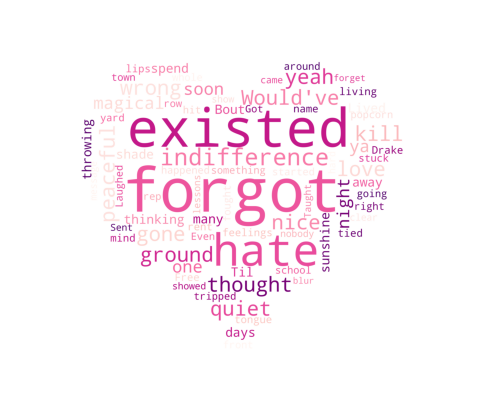

In [133]:
# We need to import some packages to make word clouds.
from wordcloud import WordCloud
from PIL import Image

# This function creates a word cloud for a given song.
def generate_lyrics_wordcloud(song_name):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='RdPu',
                      mask=np.array(Image.open('data/images/heart.jpeg')),
                      background_color='white',
                      collocations=False).generate(lover_df.get('Lyrics').loc[song_name])
    plt.figure(figsize=(7, 5), dpi=100)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

default_lover = 'I Forgot That You Existed'

song_options_lover = np.array(lover_df.index)
song_widget_lover = widgets.Dropdown(options=song_options_lover, description='Song', layout={'width': '525px'}, value=default_lover)

def change_rec_lover(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget_lover)
        display(HTML('Note: It may take a few seconds for the updated word cloud to appear.'))
        generate_lyrics_wordcloud(song_widget_lover.value)

display(song_widget_lover)
generate_lyrics_wordcloud(default_lover)
song_widget_lover.observe(change_rec_lover)

## Parting Thoughts 💭 

Big congratulations on finishing the Midterm Project! 🎉 We hope this experience gave you a taste of what doing data science is really like: frustrating at times, but incredibly satisfying when you produce a finished product you're proud of! If you feeling like telling everyone you know about the cool song recommender you created or the beautiful word clouds you generated, that's a good sign!

You're likely a stronger programmer and data scientist now than you were before you started this project, after all the effort you put into completing it. As a reminder of the growth you can achieve through hard work, and the fact that success does not come by accident, here's a spoof of Taylor Swift's song `'Mastermind'` about succeeding in DSC 10. 

```
Once upon a time, 
pandas were just bears, Jupyter was in the sky.
I took a ten week course in data science,
And learned otherwise.

In the front row of class, 9am.
Asking questions on Ed yet again.
Churning through extra practice problems.
Solutions? Don't need them.

What if I told you none of it was accidental?
From the first class that you taught me, nothing was gonna stop me?
I laid the groundwork and then did the hard work.
The test cases all passed one at a time.

What if I told you I'm a mastermind?
I'm good at data science.
I just worked all the time. 
And now I'm a mastermind.

You see, all the wisest students had to do it this way.
'Cause we were born to understand things as we toil away.

If you fail to plan, you plan to fail.
Strategy sets the scene for the tale.
So I cleared time in my schedule 
For a lot of nights in Geisel.

What if I told you none of it was accidental?
From the first class that you taught me, nothing was gonna stop me?
I laid the groundwork and then did the hard work.
The test cases all passed one at a time.

What if I told you I'm a mastermind?
I’m good at data science.
It was all by design.
And now I'm a mastermind.

No one wanted to work with me on the big project. 
So I've been getting all the tutor help I can get.
I think they love me for all the effort I have spent.
This is the first time I felt the need to confess.
And I swear, I'm only understanding this material 
'Cause I care.

So I told you none of it was accidental.
And when finals were graded, nothing was gonna stop me.
I peeked at Gradescope, exclaimed with newfound hope, 
"My final exam grade is ninety nine!"

Because I am a mastermind.
I'm good at data science. 
Yeah, all I can do is smile.
'Cause I'm a mastermind.
```








<a id='emojiquiz'></a>

## Taylor Swift Emoji Quiz 💯

Just for fun, here are some emojis that describe particular Taylor Swift songs. See how many you can identify! We'll post the answers on Ed after the project is due. 

1. 👋👋👶
1. ⛔🎮
1. 👑❤
1. 🖼🔥
1. 🕛🌧
1. 🍀 1️⃣
1. 📃💍
1. ❄🔁
1. 😢➡🎸
1. 🎠
1. 🔎🧶
1. 🏹
1. ❄🏖
1. 🚗💨
1. 👎🩸
1. 🍭🚫
1. 🍾😧
1. 🍦🏝
1. 🧼🧹
1. 🃏🔁
1. 🌟💡
1. 📜➡🍼
1. 🧨✈
1. 💕📖
1. 🗣⏳
1. 👻😱
1. 🔌👆
1. 🚫🦸‍♀️


## References and Data Sources 📖

If you're interested in learning more about the data and analysis that inspired this project, check out Alice Zhao's blog post [A Data Scientist Breaks Down All 10 Taylor Swift Albums (The Extended Version)](https://adashofdata.com/2023/03/01/a-data-scientist-breaks-down-all-10-taylor-swift-albums-the-extended-version/). Here's a plot from Alice's analysis showing that Taylor Swift's music is getting more experimental over time.

<center><img src='data/images/evolution.jpg' width=600></center>

Below are links to all the resources we used in developing this project. Thanks to all the people who provide these resources!

- Shayna Kothari, [Taylor Swift Lyric Searcher](https://shaynak.github.io/taylor-swift/) and [source code](https://github.com/shaynak/taylor-swift) 
- Tia Plagata, [How to Create Beautiful Word Clouds in Python](https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214)
- Melanie Walsh, [Introduction to Cultural Analytics & Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html)
- Cameron Watts, [Extracting Song Data From the Spotify API Using Python](https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50)
- Alice Zhao, A Dash of Data, [A Data Scientist Breaks Down All 10 Taylor Swift Albums (The Extended Version)](https://adashofdata.com/2023/03/01/a-data-scientist-breaks-down-all-10-taylor-swift-albums-the-extended-version/) and [source code](https://github.com/adashofdata/taylor_swift_data)
- Lyrics data from [Genius API](https://genius.com/)
- Musical data from [Spotify API](https://developer.spotify.com/)


**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

## Submission Instructions 📧

As usual, follow these steps to submit your assignment:

Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope. 
1. If working with a partner, don't forget to add your partner as a group member on Gradescope!
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

If running all the tests at once causes a test to fail that didn't fail when you ran the notebook in order, check to see if you changed a variable's value later in your code. Make sure to use new variable names instead of reusing ones that are used in the tests. 

Remember, the tests here and on Gradescope just check the format of your answers. We will run correctness tests after the due date has passed.

In [134]:
grader.check_all()

q0_1 results: All test cases passed!

q0_2 results: All test cases passed!

q0_3 results: All test cases passed!

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_12 results: All test cases passed!

q1_13 results: All test cases passed!

q1_14 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 re